In [62]:
from dataset_generator import PricingsLoader
from matplotlib import pyplot as plt
from models import PricingManager
from IPython.display import display, Markdown
import numpy as np
import pandas as pd

STUDIED_YEARS = ["2019", "2020", "2021", "2022", "2023", "2024"]

In [69]:
def get_data_from_dataset(dataset):
    data = {}
    max_plans = 0
    max_features = 0
    max_add_ons = 0

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        saas_index_name = pricing.saas_name.split(" ")[0].strip().lower().capitalize()
        if saas_index_name.lower() == "office":
            continue
        if saas_index_name not in data:
            data[saas_index_name] = {year: None for year in STUDIED_YEARS}
        
        data[saas_index_name][str(pricing.year)] = {}
        data[saas_index_name][str(pricing.year)]["number_of_features"] = len(pricing.features)
        data[saas_index_name][str(pricing.year)]["number_of_plans"] = len(pricing.plans)
        data[saas_index_name][str(pricing.year)]["number_of_addons"] = len(pricing.add_ons)
        data[saas_index_name][str(pricing.year)]["has_many_products"] = len(pricing.saas_name.strip().split(" ")) > 1

        if len(pricing.features) > max_features:
            max_features = len(pricing.features)
        
        if len(pricing.plans) > max_plans:
            max_plans = len(pricing.plans)
        
        if len(pricing.add_ons) > max_add_ons:
            max_add_ons = len(pricing.add_ons)

    data_items = sorted(data.items(), key=lambda x: x[0], reverse=True)
    data = dict(data_items)

    return data, max_plans, max_features, max_add_ons

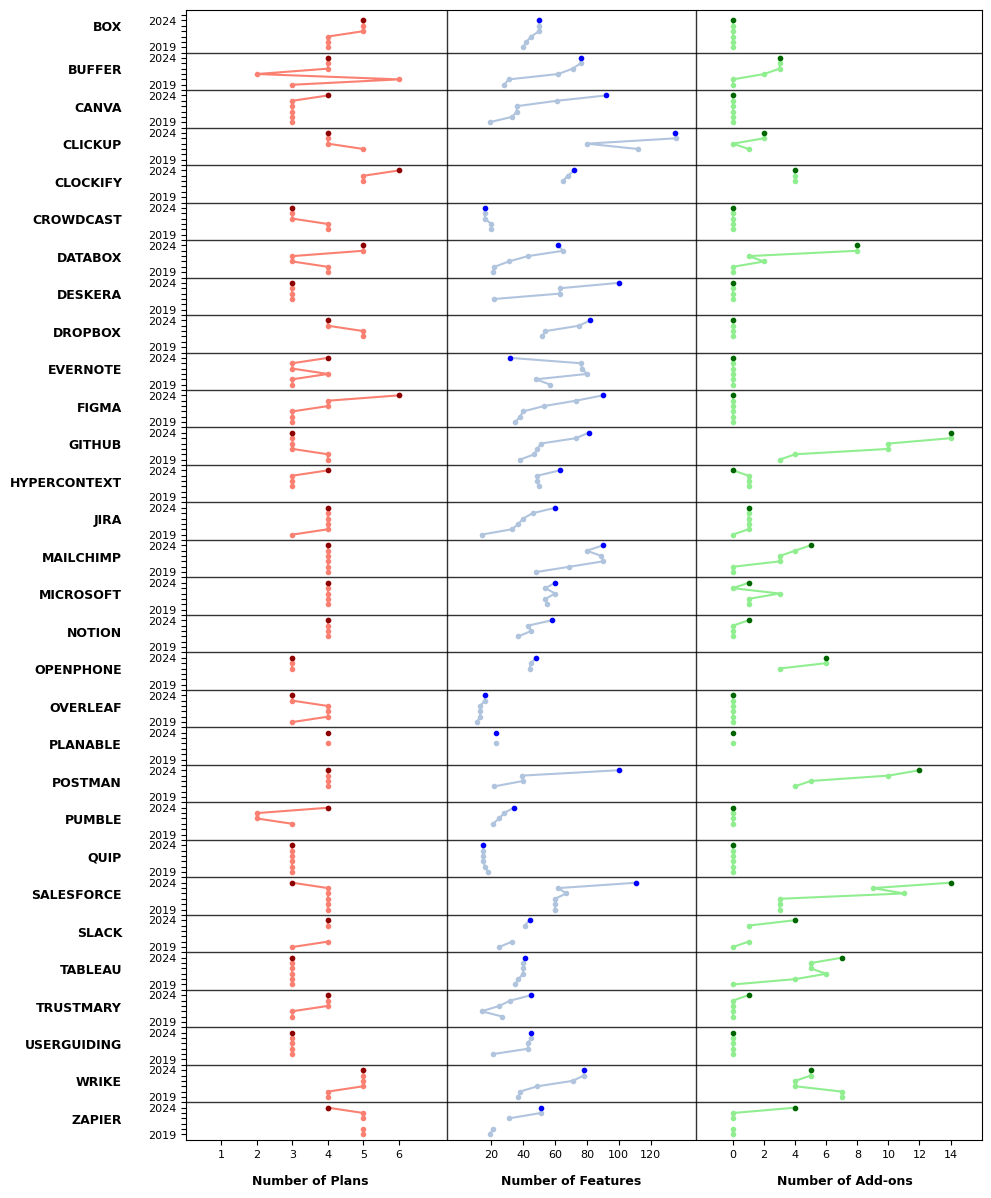

In [70]:
METRICS = ["Number of Plans", "Number of Features", "Number of Add-ons"]
GROUP_SIZE = len(STUDIED_YEARS)+1
X_SEPARATION = 10
FIG_HEIGHT = 12
X_AXIS_WIDTH = 300

TAGS_INTERVAL_PLANS = 1
TAGS_INTERVAL_FEATURES = 20
TAGS_INTERVAL_ADD_ONS = 2

RECTANGLE_WIDTH = X_AXIS_WIDTH//(len(METRICS))

def format_data_for_visualization(data, max_plans, max_features, max_add_ons):
    formatted_data = {}
    data_items = list(data.items())
    
    for i in range(len(data)):
        start_y_pos = i*GROUP_SIZE
        end_y_pos = start_y_pos + GROUP_SIZE - 1
        saas = data_items[i][0]
        saas_details = data_items[i][1]
        formatted_data[saas] = {'plans': {'x': [], 'y': []}, 'features': {'x': [], 'y': []}, 'add_ons': {'x': [], 'y': []}}

        for j in range(start_y_pos, end_y_pos):
            iter_index = j - start_y_pos
            year = STUDIED_YEARS[iter_index]
            year_data = saas_details[year]
            number_of_plans = None
            number_of_features = None
            number_of_add_ons = None

            if year_data is not None:
                number_of_plans = RECTANGLE_WIDTH/(max_plans + TAGS_INTERVAL_PLANS) * year_data['number_of_plans']
                number_of_features =  RECTANGLE_WIDTH + X_SEPARATION + RECTANGLE_WIDTH/(max_features + TAGS_INTERVAL_FEATURES) * year_data['number_of_features']
                number_of_add_ons = 2*RECTANGLE_WIDTH + 2*X_SEPARATION + RECTANGLE_WIDTH/(max_add_ons + TAGS_INTERVAL_ADD_ONS) * year_data['number_of_addons']

            formatted_data[saas]['plans']['x'].append(number_of_plans)
            formatted_data[saas]['features']['x'].append(number_of_features)
            formatted_data[saas]['add_ons']['x'].append(number_of_add_ons)
            formatted_data[saas]['plans']['y'].append(j)
            formatted_data[saas]['features']['y'].append(j)
            formatted_data[saas]['add_ons']['y'].append(j)
    
    return formatted_data

def generate_figure(dataset):

    data, max_plans, max_features, max_add_ons = get_data_from_dataset(dataset)

    formatted_data = format_data_for_visualization(data, max_plans, max_features, max_add_ons)

    ds_size = len(data)

    x_plans_ticks = list(np.arange(0, RECTANGLE_WIDTH+1, TAGS_INTERVAL_PLANS*RECTANGLE_WIDTH/(max_plans + TAGS_INTERVAL_PLANS)))[1:-1]
    x_features_ticks = list(np.arange(RECTANGLE_WIDTH+X_SEPARATION, 2*RECTANGLE_WIDTH+X_SEPARATION+1, TAGS_INTERVAL_FEATURES*RECTANGLE_WIDTH/(max_features + TAGS_INTERVAL_FEATURES)))[1:-1]
    x_add_ons_ticks = list(np.arange(2*RECTANGLE_WIDTH+2*X_SEPARATION, 3*RECTANGLE_WIDTH+2*X_SEPARATION+1, TAGS_INTERVAL_ADD_ONS*RECTANGLE_WIDTH/(max_add_ons + TAGS_INTERVAL_ADD_ONS)))[:-1]

    x_plans_tags = [i for i in range(1, max_plans + 1, TAGS_INTERVAL_PLANS)]
    x_features_tags = [i for i in range(TAGS_INTERVAL_FEATURES, max_features + 1, TAGS_INTERVAL_FEATURES)]
    x_add_ons_tags = [i for i in range(0, max_add_ons + 1, TAGS_INTERVAL_ADD_ONS)]

    x_ticks = x_plans_ticks + x_features_ticks + x_add_ons_ticks
    x_tags = x_plans_tags + x_features_tags + x_add_ons_tags
    y_range = range(ds_size*7)
    y_tags = ([STUDIED_YEARS[0]] + ["  "]*(len(STUDIED_YEARS)-2) + [STUDIED_YEARS[-1]] + ["  "])*ds_size

    fig, ax = plt.subplots(figsize=(10, FIG_HEIGHT))

    for _, values in formatted_data.items():
        ax.plot(values['plans']['x'], values['plans']['y'], marker='o', linestyle='-', color='salmon', markersize=3)
        ax.plot(values['features']['x'], values['features']['y'], marker='o', linestyle='-', color='lightsteelblue', markersize=3)
        ax.plot(values['add_ons']['x'], values['add_ons']['y'], marker='o', linestyle='-', color='lightgreen', markersize=3)
        
        filtered_plans_x = list(filter(lambda x: x is not None, values['plans']['x']))
        filtered_plans_y = list(filter(lambda y: y is not None, values['plans']['y']))
        filtered_features_x = list(filter(lambda x: x is not None, values['features']['x']))
        filtered_features_y = list(filter(lambda y: y is not None, values['features']['y']))
        filtered_add_ons_x = list(filter(lambda x: x is not None, values['add_ons']['x']))
        filtered_add_ons_y = list(filter(lambda y: y is not None, values['add_ons']['y']))
        
        ax.plot(filtered_plans_x[-1], filtered_plans_y[-1], marker='o', linestyle='-', color='darkred', markersize=3)  
        ax.plot(filtered_features_x[-1], filtered_features_y[-1], marker='o', linestyle='-', color='blue', markersize=3)
        ax.plot(filtered_add_ons_x[-1], filtered_add_ons_y[-1], marker='o', linestyle='-', color='darkgreen', markersize=3)
    
    ax.set_xticks(x_ticks, labels=x_tags)
    ax.set_yticks(y_range, labels=y_tags)
    ax.tick_params(axis='x', labelsize=8)
    ax.tick_params(axis='y', labelsize=8)
    
    yticks = ax.get_yticks()

    for i in range(0, len(yticks), 7):

        if i + 7 < len(yticks):
            group_label_position = (yticks[i] + yticks[i + 4]) / 2
        else:
            group_label_position = (yticks[i] + yticks[-1]) / 2
        
        separator_position = yticks[i-1]

        ax.text(-0.08, group_label_position, list(map(lambda x: x.upper(), formatted_data.keys()))[i//7], transform=ax.get_yaxis_transform(),
                horizontalalignment='right', fontsize=9, fontweight='bold')
        
        if i > 0:
            ax.axhline(y=separator_position, color='black', linestyle='-', linewidth=1, alpha=0.8)
            
    for i in range(len(METRICS)):
    
        x_separation_start_coef = i - 1
    
        if x_separation_start_coef < 0:
            x_separation_start_coef = 0

        tag_position = (i*RECTANGLE_WIDTH + x_separation_start_coef*X_SEPARATION + (i+1)*RECTANGLE_WIDTH+i*X_SEPARATION) / 2
    
        ax.text(tag_position, -0.04, METRICS[i], transform=ax.get_xaxis_transform(),
                horizontalalignment='center', fontsize=9, fontweight='bold')

    ax.axvline(x=RECTANGLE_WIDTH + X_SEPARATION/2, color='black', linestyle='-', linewidth=1, alpha=0.8)
    ax.axvline(x=2*RECTANGLE_WIDTH + X_SEPARATION/2, color='black', linestyle='-', linewidth=1, alpha=0.8)

    ax.set_xbound(0, 3*RECTANGLE_WIDTH + 2*X_SEPARATION)
    ax.set_ybound(-1, ds_size*7)
    plt.tight_layout()
    plt.savefig('../../figures/pricings_evolution.png')
    plt.show()

dataset = PricingsLoader('../../pricings')
generate_figure(dataset)

In [71]:
import pandas as pd

def build_dataframe(data):
    # Inicializamos una lista para almacenar los registros
    records = []

    # Iteramos a través del diccionario anidado
    for saas, years in data.items():
        for year, metrics in years.items():
            if metrics is not None:  # Verificamos si hay métricas disponibles para ese año
                # Creamos un registro con la estructura deseada y lo añadimos a la lista de registros
                record = {
                    'Saas': saas,
                    'Year': int(year),
                    'Plans': metrics.get('number_of_plans'),
                    'Features': metrics.get('number_of_features'),
                    'Addons': metrics.get('number_of_addons'),
                    'Has_Many_Products': metrics.get('has_many_products')
                }
                records.append(record)

    # Convertimos la lista de registros a un DataFrame de Pandas
    df = pd.DataFrame(records, columns=['Saas', 'Year', 'Plans', 'Features', 'Addons', 'Has_Many_Products'])
    return df
# Construcción del DataFrame
data, max_plans, max_features, max_add_ons = get_data_from_dataset(dataset)
df = build_dataframe(data)

# Mostrar el DataFrame
df

,Saas,Year,Plans,Features,Addons,Has_Many_Products
0,Zapier,2019,5,19,0,False
1,Zapier,2020,5,21,0,False
2,Zapier,2022,5,31,0,False
3,Zapier,2023,5,51,0,False
4,Zapier,2024,4,51,4,False
...,...,...,...,...,...,...
142,Box,2020,4,42,0,False
143,Box,2021,4,45,0,False
144,Box,2022,5,50,0,False
145,Box,2023,5,50,0,False


In [72]:
def normalize_columns(df, columns):
    # Normalization of the values for the specified columns
    for column in columns:
        col_min = df.groupby('Saas')[column].transform('min')
        col_max = df.groupby('Saas')[column].transform('max')
        dif = col_max - col_min                
        df[column + '_normalized'] = (df[column] - col_min) / dif
        df[column + '_normalized'] = df[column + '_normalized'].where(dif != 0, 1)
        df[column + '_min'] = col_min
        df[column + '_max'] = col_max
    return df

df_normalized = normalize_columns(df, ['Plans', 'Features', 'Addons'])

df_normalized

,Saas,Year,Plans,Features,Addons,Has_Many_Products,Plans_normalized,Plans_min,Plans_max,Features_normalized,Features_min,Features_max,Addons_normalized,Addons_min,Addons_max
0,Zapier,2019,5,19,0,False,1.0,4,5,0.0000,19,51,0.0,0,4
1,Zapier,2020,5,21,0,False,1.0,4,5,0.0625,19,51,0.0,0,4
2,Zapier,2022,5,31,0,False,1.0,4,5,0.3750,19,51,0.0,0,4
3,Zapier,2023,5,51,0,False,1.0,4,5,1.0000,19,51,0.0,0,4
4,Zapier,2024,4,51,4,False,0.0,4,5,1.0000,19,51,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Box,2020,4,42,0,False,0.0,4,5,0.2000,40,50,1.0,0,0
143,Box,2021,4,45,0,False,0.0,4,5,0.5000,40,50,1.0,0,0
144,Box,2022,5,50,0,False,1.0,4,5,1.0000,40,50,1.0,0,0
145,Box,2023,5,50,0,False,1.0,4,5,1.0000,40,50,1.0,0,0


In [73]:
# Save the dataframes as CSV
df.to_csv('saas_pricingplans.csv', index=False)
df_normalized.to_csv('saas_pricingplans_normalized.csv', index=False)

# Show the entire dataframes in this notebook:
display(Markdown("# SaaS Pricing Plans"))
display(Markdown(df.to_markdown()))
display(Markdown("# Normalized SaaS Pricing Plans"))
display(Markdown(df_normalized.to_markdown()))

# SaaS Pricing Plans

|     | Saas         |   Year |   Plans |   Features |   Addons | Has_Many_Products   |   Plans_normalized |   Plans_min |   Plans_max |   Features_normalized |   Features_min |   Features_max |   Addons_normalized |   Addons_min |   Addons_max |
|----:|:-------------|-------:|--------:|-----------:|---------:|:--------------------|-------------------:|------------:|------------:|----------------------:|---------------:|---------------:|--------------------:|-------------:|-------------:|
|   0 | Zapier       |   2019 |       5 |         19 |        0 | False               |           1        |           4 |           5 |             0         |             19 |             51 |           0         |            0 |            4 |
|   1 | Zapier       |   2020 |       5 |         21 |        0 | False               |           1        |           4 |           5 |             0.0625    |             19 |             51 |           0         |            0 |            4 |
|   2 | Zapier       |   2022 |       5 |         31 |        0 | False               |           1        |           4 |           5 |             0.375     |             19 |             51 |           0         |            0 |            4 |
|   3 | Zapier       |   2023 |       5 |         51 |        0 | False               |           1        |           4 |           5 |             1         |             19 |             51 |           0         |            0 |            4 |
|   4 | Zapier       |   2024 |       4 |         51 |        4 | False               |           0        |           4 |           5 |             1         |             19 |             51 |           1         |            0 |            4 |
|   5 | Wrike        |   2019 |       4 |         37 |        7 | False               |           0        |           4 |           5 |             0         |             37 |             78 |           1         |            4 |            7 |
|   6 | Wrike        |   2020 |       4 |         38 |        7 | False               |           0        |           4 |           5 |             0.0243902 |             37 |             78 |           1         |            4 |            7 |
|   7 | Wrike        |   2021 |       5 |         49 |        4 | False               |           1        |           4 |           5 |             0.292683  |             37 |             78 |           0         |            4 |            7 |
|   8 | Wrike        |   2022 |       5 |         71 |        4 | False               |           1        |           4 |           5 |             0.829268  |             37 |             78 |           0         |            4 |            7 |
|   9 | Wrike        |   2023 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  10 | Wrike        |   2024 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  11 | Userguiding  |   2020 |       3 |         21 |        0 | False               |           1        |           3 |           3 |             0         |             21 |             45 |           1         |            0 |            0 |
|  12 | Userguiding  |   2021 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.916667  |             21 |             45 |           1         |            0 |            0 |
|  13 | Userguiding  |   2022 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.916667  |             21 |             45 |           1         |            0 |            0 |
|  14 | Userguiding  |   2023 |       3 |         45 |        0 | False               |           1        |           3 |           3 |             1         |             21 |             45 |           1         |            0 |            0 |
|  15 | Trustmary    |   2020 |       3 |         27 |        0 | True                |           0        |           3 |           4 |             0.419355  |             14 |             45 |           0         |            0 |            1 |
|  16 | Trustmary    |   2021 |       3 |         14 |        0 | True                |           0        |           3 |           4 |             0         |             14 |             45 |           0         |            0 |            1 |
|  17 | Trustmary    |   2022 |       4 |         25 |        0 | False               |           1        |           3 |           4 |             0.354839  |             14 |             45 |           0         |            0 |            1 |
|  18 | Trustmary    |   2023 |       4 |         32 |        0 | True                |           1        |           3 |           4 |             0.580645  |             14 |             45 |           0         |            0 |            1 |
|  19 | Trustmary    |   2024 |       4 |         45 |        1 | True                |           1        |           3 |           4 |             1         |             14 |             45 |           1         |            0 |            1 |
|  20 | Tableau      |   2019 |       3 |         35 |        0 | False               |           1        |           3 |           3 |             0         |             35 |             41 |           0         |            0 |            7 |
|  21 | Tableau      |   2020 |       3 |         37 |        4 | False               |           1        |           3 |           3 |             0.333333  |             35 |             41 |           0.571429  |            0 |            7 |
|  22 | Tableau      |   2021 |       3 |         40 |        6 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.857143  |            0 |            7 |
|  23 | Tableau      |   2022 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  24 | Tableau      |   2023 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  25 | Tableau      |   2024 |       3 |         41 |        7 | False               |           1        |           3 |           3 |             1         |             35 |             41 |           1         |            0 |            7 |
|  26 | Slack        |   2019 |       3 |         25 |        0 | False               |           0        |           3 |           4 |             0         |             25 |             44 |           0         |            0 |            4 |
|  27 | Slack        |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.421053  |             25 |             44 |           0.25      |            0 |            4 |
|  28 | Slack        |   2023 |       4 |         41 |        1 | False               |           1        |           3 |           4 |             0.842105  |             25 |             44 |           0.25      |            0 |            4 |
|  29 | Slack        |   2024 |       4 |         44 |        4 | False               |           1        |           3 |           4 |             1         |             25 |             44 |           1         |            0 |            4 |
|  30 | Salesforce   |   2019 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  31 | Salesforce   |   2020 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  32 | Salesforce   |   2021 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  33 | Salesforce   |   2022 |       4 |         67 |       11 | True                |           1        |           3 |           4 |             0.137255  |             60 |            111 |           0.727273  |            3 |           14 |
|  34 | Salesforce   |   2023 |       4 |         62 |        9 | True                |           1        |           3 |           4 |             0.0392157 |             60 |            111 |           0.545455  |            3 |           14 |
|  35 | Salesforce   |   2024 |       3 |        111 |       14 | True                |           0        |           3 |           4 |             1         |             60 |            111 |           1         |            3 |           14 |
|  36 | Quip         |   2019 |       3 |         18 |        0 | False               |           1        |           3 |           3 |             1         |             15 |             18 |           1         |            0 |            0 |
|  37 | Quip         |   2020 |       3 |         16 |        0 | False               |           1        |           3 |           3 |             0.333333  |             15 |             18 |           1         |            0 |            0 |
|  38 | Quip         |   2021 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  39 | Quip         |   2022 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  40 | Quip         |   2023 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  41 | Quip         |   2024 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  42 | Pumble       |   2021 |       3 |         21 |        0 | False               |           0.5      |           2 |           4 |             0         |             21 |             34 |           1         |            0 |            0 |
|  43 | Pumble       |   2022 |       2 |         25 |        0 | False               |           0        |           2 |           4 |             0.307692  |             21 |             34 |           1         |            0 |            0 |
|  44 | Pumble       |   2023 |       2 |         28 |        0 | False               |           0        |           2 |           4 |             0.538462  |             21 |             34 |           1         |            0 |            0 |
|  45 | Pumble       |   2024 |       4 |         34 |        0 | False               |           1        |           2 |           4 |             1         |             21 |             34 |           1         |            0 |            0 |
|  46 | Postman      |   2021 |       4 |         22 |        4 | False               |           1        |           4 |           4 |             0         |             22 |            100 |           0         |            4 |           12 |
|  47 | Postman      |   2022 |       4 |         40 |        5 | False               |           1        |           4 |           4 |             0.230769  |             22 |            100 |           0.125     |            4 |           12 |
|  48 | Postman      |   2023 |       4 |         39 |       10 | False               |           1        |           4 |           4 |             0.217949  |             22 |            100 |           0.75      |            4 |           12 |
|  49 | Postman      |   2024 |       4 |        100 |       12 | False               |           1        |           4 |           4 |             1         |             22 |            100 |           1         |            4 |           12 |
|  50 | Planable     |   2022 |       4 |         23 |        0 | False               |           1        |           4 |           4 |             1         |             23 |             23 |           1         |            0 |            0 |
|  51 | Overleaf     |   2019 |       3 |         11 |        0 | False               |           0        |           3 |           4 |             0         |             11 |             16 |           1         |            0 |            0 |
|  52 | Overleaf     |   2020 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  53 | Overleaf     |   2021 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  54 | Overleaf     |   2022 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  55 | Overleaf     |   2023 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  56 | Overleaf     |   2024 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  57 | Openphone    |   2022 |       3 |         44 |        3 | False               |           1        |           3 |           3 |             0         |             44 |             48 |           0         |            3 |            6 |
|  58 | Openphone    |   2023 |       3 |         45 |        6 | False               |           1        |           3 |           3 |             0.25      |             44 |             48 |           1         |            3 |            6 |
|  59 | Openphone    |   2024 |       3 |         48 |        6 | False               |           1        |           3 |           3 |             1         |             44 |             48 |           1         |            3 |            6 |
|  60 | Notion       |   2021 |       4 |         37 |        0 | False               |           1        |           4 |           4 |             0         |             37 |             58 |           0         |            0 |            1 |
|  61 | Notion       |   2022 |       4 |         45 |        0 | False               |           1        |           4 |           4 |             0.380952  |             37 |             58 |           0         |            0 |            1 |
|  62 | Notion       |   2023 |       4 |         43 |        0 | False               |           1        |           4 |           4 |             0.285714  |             37 |             58 |           0         |            0 |            1 |
|  63 | Notion       |   2024 |       4 |         58 |        1 | False               |           1        |           4 |           4 |             1         |             37 |             58 |           1         |            0 |            1 |
|  64 | Microsoft    |   2020 |       4 |         55 |        1 | True                |           1        |           4 |           4 |             0.166667  |             54 |             60 |           0.333333  |            0 |            3 |
|  65 | Microsoft    |   2021 |       4 |         54 |        1 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0.333333  |            0 |            3 |
|  66 | Microsoft    |   2022 |       4 |         60 |        3 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           1         |            0 |            3 |
|  67 | Microsoft    |   2023 |       4 |         54 |        0 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0         |            0 |            3 |
|  68 | Microsoft    |   2024 |       4 |         60 |        1 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           0.333333  |            0 |            3 |
|  69 | Mailchimp    |   2019 |       4 |         48 |        0 | False               |           1        |           4 |           4 |             0         |             48 |             90 |           0         |            0 |            5 |
|  70 | Mailchimp    |   2020 |       4 |         69 |        0 | False               |           1        |           4 |           4 |             0.5       |             48 |             90 |           0         |            0 |            5 |
|  71 | Mailchimp    |   2021 |       4 |         90 |        3 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           0.6       |            0 |            5 |
|  72 | Mailchimp    |   2022 |       4 |         89 |        3 | True                |           1        |           4 |           4 |             0.97619   |             48 |             90 |           0.6       |            0 |            5 |
|  73 | Mailchimp    |   2023 |       4 |         80 |        4 | True                |           1        |           4 |           4 |             0.761905  |             48 |             90 |           0.8       |            0 |            5 |
|  74 | Mailchimp    |   2024 |       4 |         90 |        5 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           1         |            0 |            5 |
|  75 | Jira         |   2019 |       3 |         14 |        0 | False               |           0        |           3 |           4 |             0         |             14 |             60 |           0         |            0 |            1 |
|  76 | Jira         |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.413043  |             14 |             60 |           1         |            0 |            1 |
|  77 | Jira         |   2021 |       4 |         37 |        1 | False               |           1        |           3 |           4 |             0.5       |             14 |             60 |           1         |            0 |            1 |
|  78 | Jira         |   2022 |       4 |         40 |        1 | False               |           1        |           3 |           4 |             0.565217  |             14 |             60 |           1         |            0 |            1 |
|  79 | Jira         |   2023 |       4 |         46 |        1 | False               |           1        |           3 |           4 |             0.695652  |             14 |             60 |           1         |            0 |            1 |
|  80 | Jira         |   2024 |       4 |         60 |        1 | False               |           1        |           3 |           4 |             1         |             14 |             60 |           1         |            0 |            1 |
|  81 | Hypercontext |   2021 |       3 |         50 |        1 | False               |           0        |           3 |           4 |             0.0714286 |             49 |             63 |           1         |            0 |            1 |
|  82 | Hypercontext |   2022 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  83 | Hypercontext |   2023 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  84 | Hypercontext |   2024 |       4 |         63 |        0 | False               |           1        |           3 |           4 |             1         |             49 |             63 |           0         |            0 |            1 |
|  85 | Github       |   2019 |       4 |         38 |        3 | False               |           1        |           3 |           4 |             0         |             38 |             81 |           0         |            3 |           14 |
|  86 | Github       |   2020 |       4 |         47 |        4 | False               |           1        |           3 |           4 |             0.209302  |             38 |             81 |           0.0909091 |            3 |           14 |
|  87 | Github       |   2021 |       3 |         49 |       10 | False               |           0        |           3 |           4 |             0.255814  |             38 |             81 |           0.636364  |            3 |           14 |
|  88 | Github       |   2022 |       3 |         51 |       10 | False               |           0        |           3 |           4 |             0.302326  |             38 |             81 |           0.636364  |            3 |           14 |
|  89 | Github       |   2023 |       3 |         73 |       14 | False               |           0        |           3 |           4 |             0.813953  |             38 |             81 |           1         |            3 |           14 |
|  90 | Github       |   2024 |       3 |         81 |       14 | False               |           0        |           3 |           4 |             1         |             38 |             81 |           1         |            3 |           14 |
|  91 | Figma        |   2019 |       3 |         35 |        0 | False               |           0        |           3 |           6 |             0         |             35 |             90 |           1         |            0 |            0 |
|  92 | Figma        |   2020 |       3 |         38 |        0 | False               |           0        |           3 |           6 |             0.0545455 |             35 |             90 |           1         |            0 |            0 |
|  93 | Figma        |   2021 |       3 |         40 |        0 | False               |           0        |           3 |           6 |             0.0909091 |             35 |             90 |           1         |            0 |            0 |
|  94 | Figma        |   2022 |       4 |         53 |        0 | False               |           0.333333 |           3 |           6 |             0.327273  |             35 |             90 |           1         |            0 |            0 |
|  95 | Figma        |   2023 |       4 |         73 |        0 | False               |           0.333333 |           3 |           6 |             0.690909  |             35 |             90 |           1         |            0 |            0 |
|  96 | Figma        |   2024 |       6 |         90 |        0 | False               |           1        |           3 |           6 |             1         |             35 |             90 |           1         |            0 |            0 |
|  97 | Evernote     |   2019 |       3 |         57 |        0 | False               |           0        |           3 |           4 |             0.520833  |             32 |             80 |           1         |            0 |            0 |
|  98 | Evernote     |   2020 |       3 |         48 |        0 | False               |           0        |           3 |           4 |             0.333333  |             32 |             80 |           1         |            0 |            0 |
|  99 | Evernote     |   2021 |       4 |         80 |        0 | False               |           1        |           3 |           4 |             1         |             32 |             80 |           1         |            0 |            0 |
| 100 | Evernote     |   2022 |       3 |         77 |        0 | False               |           0        |           3 |           4 |             0.9375    |             32 |             80 |           1         |            0 |            0 |
| 101 | Evernote     |   2023 |       3 |         76 |        0 | False               |           0        |           3 |           4 |             0.916667  |             32 |             80 |           1         |            0 |            0 |
| 102 | Evernote     |   2024 |       4 |         32 |        0 | False               |           1        |           3 |           4 |             0         |             32 |             80 |           1         |            0 |            0 |
| 103 | Dropbox      |   2021 |       5 |         52 |        0 | False               |           1        |           4 |           5 |             0         |             52 |             82 |           1         |            0 |            0 |
| 104 | Dropbox      |   2022 |       5 |         54 |        0 | False               |           1        |           4 |           5 |             0.0666667 |             52 |             82 |           1         |            0 |            0 |
| 105 | Dropbox      |   2023 |       4 |         75 |        0 | False               |           0        |           4 |           5 |             0.766667  |             52 |             82 |           1         |            0 |            0 |
| 106 | Dropbox      |   2024 |       4 |         82 |        0 | False               |           0        |           4 |           5 |             1         |             52 |             82 |           1         |            0 |            0 |
| 107 | Deskera      |   2021 |       3 |         22 |        0 | False               |           1        |           3 |           3 |             0         |             22 |            100 |           1         |            0 |            0 |
| 108 | Deskera      |   2022 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 109 | Deskera      |   2023 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 110 | Deskera      |   2024 |       3 |        100 |        0 | False               |           1        |           3 |           3 |             1         |             22 |            100 |           1         |            0 |            0 |
| 111 | Databox      |   2019 |       4 |         21 |        0 | False               |           0.5      |           3 |           5 |             0         |             21 |             65 |           0         |            0 |            8 |
| 112 | Databox      |   2020 |       4 |         22 |        0 | False               |           0.5      |           3 |           5 |             0.0227273 |             21 |             65 |           0         |            0 |            8 |
| 113 | Databox      |   2021 |       3 |         31 |        2 | False               |           0        |           3 |           5 |             0.227273  |             21 |             65 |           0.25      |            0 |            8 |
| 114 | Databox      |   2022 |       3 |         43 |        1 | False               |           0        |           3 |           5 |             0.5       |             21 |             65 |           0.125     |            0 |            8 |
| 115 | Databox      |   2023 |       5 |         65 |        8 | False               |           1        |           3 |           5 |             1         |             21 |             65 |           1         |            0 |            8 |
| 116 | Databox      |   2024 |       5 |         62 |        8 | False               |           1        |           3 |           5 |             0.931818  |             21 |             65 |           1         |            0 |            8 |
| 117 | Crowdcast    |   2020 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 118 | Crowdcast    |   2021 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 119 | Crowdcast    |   2022 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 120 | Crowdcast    |   2023 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 121 | Crowdcast    |   2024 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 122 | Clockify     |   2022 |       5 |         65 |        4 | False               |           0        |           5 |           6 |             0         |             65 |             72 |           1         |            4 |            4 |
| 123 | Clockify     |   2023 |       5 |         68 |        4 | False               |           0        |           5 |           6 |             0.428571  |             65 |             72 |           1         |            4 |            4 |
| 124 | Clockify     |   2024 |       6 |         72 |        4 | False               |           1        |           5 |           6 |             1         |             65 |             72 |           1         |            4 |            4 |
| 125 | Clickup      |   2021 |       5 |        112 |        1 | False               |           1        |           4 |           5 |             0.571429  |             80 |            136 |           0.5       |            0 |            2 |
| 126 | Clickup      |   2022 |       4 |         80 |        0 | False               |           0        |           4 |           5 |             0         |             80 |            136 |           0         |            0 |            2 |
| 127 | Clickup      |   2023 |       4 |        136 |        2 | False               |           0        |           4 |           5 |             1         |             80 |            136 |           1         |            0 |            2 |
| 128 | Clickup      |   2024 |       4 |        135 |        2 | False               |           0        |           4 |           5 |             0.982143  |             80 |            136 |           1         |            0 |            2 |
| 129 | Canva        |   2019 |       3 |         19 |        0 | False               |           0        |           3 |           4 |             0         |             19 |             92 |           1         |            0 |            0 |
| 130 | Canva        |   2020 |       3 |         33 |        0 | False               |           0        |           3 |           4 |             0.191781  |             19 |             92 |           1         |            0 |            0 |
| 131 | Canva        |   2021 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 132 | Canva        |   2022 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 133 | Canva        |   2023 |       3 |         61 |        0 | False               |           0        |           3 |           4 |             0.575342  |             19 |             92 |           1         |            0 |            0 |
| 134 | Canva        |   2024 |       4 |         92 |        0 | False               |           1        |           3 |           4 |             1         |             19 |             92 |           1         |            0 |            0 |
| 135 | Buffer       |   2019 |       3 |         28 |        0 | True                |           0.25     |           2 |           6 |             0         |             28 |             76 |           0         |            0 |            3 |
| 136 | Buffer       |   2020 |       6 |         31 |        0 | True                |           1        |           2 |           6 |             0.0625    |             28 |             76 |           0         |            0 |            3 |
| 137 | Buffer       |   2021 |       2 |         62 |        2 | False               |           0        |           2 |           6 |             0.708333  |             28 |             76 |           0.666667  |            0 |            3 |
| 138 | Buffer       |   2022 |       4 |         71 |        3 | False               |           0.5      |           2 |           6 |             0.895833  |             28 |             76 |           1         |            0 |            3 |
| 139 | Buffer       |   2023 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 140 | Buffer       |   2024 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 141 | Box          |   2019 |       4 |         40 |        0 | False               |           0        |           4 |           5 |             0         |             40 |             50 |           1         |            0 |            0 |
| 142 | Box          |   2020 |       4 |         42 |        0 | False               |           0        |           4 |           5 |             0.2       |             40 |             50 |           1         |            0 |            0 |
| 143 | Box          |   2021 |       4 |         45 |        0 | False               |           0        |           4 |           5 |             0.5       |             40 |             50 |           1         |            0 |            0 |
| 144 | Box          |   2022 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 145 | Box          |   2023 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 146 | Box          |   2024 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |

# Normalized SaaS Pricing Plans

|     | Saas         |   Year |   Plans |   Features |   Addons | Has_Many_Products   |   Plans_normalized |   Plans_min |   Plans_max |   Features_normalized |   Features_min |   Features_max |   Addons_normalized |   Addons_min |   Addons_max |
|----:|:-------------|-------:|--------:|-----------:|---------:|:--------------------|-------------------:|------------:|------------:|----------------------:|---------------:|---------------:|--------------------:|-------------:|-------------:|
|   0 | Zapier       |   2019 |       5 |         19 |        0 | False               |           1        |           4 |           5 |             0         |             19 |             51 |           0         |            0 |            4 |
|   1 | Zapier       |   2020 |       5 |         21 |        0 | False               |           1        |           4 |           5 |             0.0625    |             19 |             51 |           0         |            0 |            4 |
|   2 | Zapier       |   2022 |       5 |         31 |        0 | False               |           1        |           4 |           5 |             0.375     |             19 |             51 |           0         |            0 |            4 |
|   3 | Zapier       |   2023 |       5 |         51 |        0 | False               |           1        |           4 |           5 |             1         |             19 |             51 |           0         |            0 |            4 |
|   4 | Zapier       |   2024 |       4 |         51 |        4 | False               |           0        |           4 |           5 |             1         |             19 |             51 |           1         |            0 |            4 |
|   5 | Wrike        |   2019 |       4 |         37 |        7 | False               |           0        |           4 |           5 |             0         |             37 |             78 |           1         |            4 |            7 |
|   6 | Wrike        |   2020 |       4 |         38 |        7 | False               |           0        |           4 |           5 |             0.0243902 |             37 |             78 |           1         |            4 |            7 |
|   7 | Wrike        |   2021 |       5 |         49 |        4 | False               |           1        |           4 |           5 |             0.292683  |             37 |             78 |           0         |            4 |            7 |
|   8 | Wrike        |   2022 |       5 |         71 |        4 | False               |           1        |           4 |           5 |             0.829268  |             37 |             78 |           0         |            4 |            7 |
|   9 | Wrike        |   2023 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  10 | Wrike        |   2024 |       5 |         78 |        5 | False               |           1        |           4 |           5 |             1         |             37 |             78 |           0.333333  |            4 |            7 |
|  11 | Userguiding  |   2020 |       3 |         21 |        0 | False               |           1        |           3 |           3 |             0         |             21 |             45 |           1         |            0 |            0 |
|  12 | Userguiding  |   2021 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.916667  |             21 |             45 |           1         |            0 |            0 |
|  13 | Userguiding  |   2022 |       3 |         43 |        0 | False               |           1        |           3 |           3 |             0.916667  |             21 |             45 |           1         |            0 |            0 |
|  14 | Userguiding  |   2023 |       3 |         45 |        0 | False               |           1        |           3 |           3 |             1         |             21 |             45 |           1         |            0 |            0 |
|  15 | Trustmary    |   2020 |       3 |         27 |        0 | True                |           0        |           3 |           4 |             0.419355  |             14 |             45 |           0         |            0 |            1 |
|  16 | Trustmary    |   2021 |       3 |         14 |        0 | True                |           0        |           3 |           4 |             0         |             14 |             45 |           0         |            0 |            1 |
|  17 | Trustmary    |   2022 |       4 |         25 |        0 | False               |           1        |           3 |           4 |             0.354839  |             14 |             45 |           0         |            0 |            1 |
|  18 | Trustmary    |   2023 |       4 |         32 |        0 | True                |           1        |           3 |           4 |             0.580645  |             14 |             45 |           0         |            0 |            1 |
|  19 | Trustmary    |   2024 |       4 |         45 |        1 | True                |           1        |           3 |           4 |             1         |             14 |             45 |           1         |            0 |            1 |
|  20 | Tableau      |   2019 |       3 |         35 |        0 | False               |           1        |           3 |           3 |             0         |             35 |             41 |           0         |            0 |            7 |
|  21 | Tableau      |   2020 |       3 |         37 |        4 | False               |           1        |           3 |           3 |             0.333333  |             35 |             41 |           0.571429  |            0 |            7 |
|  22 | Tableau      |   2021 |       3 |         40 |        6 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.857143  |            0 |            7 |
|  23 | Tableau      |   2022 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  24 | Tableau      |   2023 |       3 |         40 |        5 | False               |           1        |           3 |           3 |             0.833333  |             35 |             41 |           0.714286  |            0 |            7 |
|  25 | Tableau      |   2024 |       3 |         41 |        7 | False               |           1        |           3 |           3 |             1         |             35 |             41 |           1         |            0 |            7 |
|  26 | Slack        |   2019 |       3 |         25 |        0 | False               |           0        |           3 |           4 |             0         |             25 |             44 |           0         |            0 |            4 |
|  27 | Slack        |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.421053  |             25 |             44 |           0.25      |            0 |            4 |
|  28 | Slack        |   2023 |       4 |         41 |        1 | False               |           1        |           3 |           4 |             0.842105  |             25 |             44 |           0.25      |            0 |            4 |
|  29 | Slack        |   2024 |       4 |         44 |        4 | False               |           1        |           3 |           4 |             1         |             25 |             44 |           1         |            0 |            4 |
|  30 | Salesforce   |   2019 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  31 | Salesforce   |   2020 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  32 | Salesforce   |   2021 |       4 |         60 |        3 | True                |           1        |           3 |           4 |             0         |             60 |            111 |           0         |            3 |           14 |
|  33 | Salesforce   |   2022 |       4 |         67 |       11 | True                |           1        |           3 |           4 |             0.137255  |             60 |            111 |           0.727273  |            3 |           14 |
|  34 | Salesforce   |   2023 |       4 |         62 |        9 | True                |           1        |           3 |           4 |             0.0392157 |             60 |            111 |           0.545455  |            3 |           14 |
|  35 | Salesforce   |   2024 |       3 |        111 |       14 | True                |           0        |           3 |           4 |             1         |             60 |            111 |           1         |            3 |           14 |
|  36 | Quip         |   2019 |       3 |         18 |        0 | False               |           1        |           3 |           3 |             1         |             15 |             18 |           1         |            0 |            0 |
|  37 | Quip         |   2020 |       3 |         16 |        0 | False               |           1        |           3 |           3 |             0.333333  |             15 |             18 |           1         |            0 |            0 |
|  38 | Quip         |   2021 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  39 | Quip         |   2022 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  40 | Quip         |   2023 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  41 | Quip         |   2024 |       3 |         15 |        0 | False               |           1        |           3 |           3 |             0         |             15 |             18 |           1         |            0 |            0 |
|  42 | Pumble       |   2021 |       3 |         21 |        0 | False               |           0.5      |           2 |           4 |             0         |             21 |             34 |           1         |            0 |            0 |
|  43 | Pumble       |   2022 |       2 |         25 |        0 | False               |           0        |           2 |           4 |             0.307692  |             21 |             34 |           1         |            0 |            0 |
|  44 | Pumble       |   2023 |       2 |         28 |        0 | False               |           0        |           2 |           4 |             0.538462  |             21 |             34 |           1         |            0 |            0 |
|  45 | Pumble       |   2024 |       4 |         34 |        0 | False               |           1        |           2 |           4 |             1         |             21 |             34 |           1         |            0 |            0 |
|  46 | Postman      |   2021 |       4 |         22 |        4 | False               |           1        |           4 |           4 |             0         |             22 |            100 |           0         |            4 |           12 |
|  47 | Postman      |   2022 |       4 |         40 |        5 | False               |           1        |           4 |           4 |             0.230769  |             22 |            100 |           0.125     |            4 |           12 |
|  48 | Postman      |   2023 |       4 |         39 |       10 | False               |           1        |           4 |           4 |             0.217949  |             22 |            100 |           0.75      |            4 |           12 |
|  49 | Postman      |   2024 |       4 |        100 |       12 | False               |           1        |           4 |           4 |             1         |             22 |            100 |           1         |            4 |           12 |
|  50 | Planable     |   2022 |       4 |         23 |        0 | False               |           1        |           4 |           4 |             1         |             23 |             23 |           1         |            0 |            0 |
|  51 | Overleaf     |   2019 |       3 |         11 |        0 | False               |           0        |           3 |           4 |             0         |             11 |             16 |           1         |            0 |            0 |
|  52 | Overleaf     |   2020 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  53 | Overleaf     |   2021 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  54 | Overleaf     |   2022 |       4 |         13 |        0 | False               |           1        |           3 |           4 |             0.4       |             11 |             16 |           1         |            0 |            0 |
|  55 | Overleaf     |   2023 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  56 | Overleaf     |   2024 |       3 |         16 |        0 | True                |           0        |           3 |           4 |             1         |             11 |             16 |           1         |            0 |            0 |
|  57 | Openphone    |   2022 |       3 |         44 |        3 | False               |           1        |           3 |           3 |             0         |             44 |             48 |           0         |            3 |            6 |
|  58 | Openphone    |   2023 |       3 |         45 |        6 | False               |           1        |           3 |           3 |             0.25      |             44 |             48 |           1         |            3 |            6 |
|  59 | Openphone    |   2024 |       3 |         48 |        6 | False               |           1        |           3 |           3 |             1         |             44 |             48 |           1         |            3 |            6 |
|  60 | Notion       |   2021 |       4 |         37 |        0 | False               |           1        |           4 |           4 |             0         |             37 |             58 |           0         |            0 |            1 |
|  61 | Notion       |   2022 |       4 |         45 |        0 | False               |           1        |           4 |           4 |             0.380952  |             37 |             58 |           0         |            0 |            1 |
|  62 | Notion       |   2023 |       4 |         43 |        0 | False               |           1        |           4 |           4 |             0.285714  |             37 |             58 |           0         |            0 |            1 |
|  63 | Notion       |   2024 |       4 |         58 |        1 | False               |           1        |           4 |           4 |             1         |             37 |             58 |           1         |            0 |            1 |
|  64 | Microsoft    |   2020 |       4 |         55 |        1 | True                |           1        |           4 |           4 |             0.166667  |             54 |             60 |           0.333333  |            0 |            3 |
|  65 | Microsoft    |   2021 |       4 |         54 |        1 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0.333333  |            0 |            3 |
|  66 | Microsoft    |   2022 |       4 |         60 |        3 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           1         |            0 |            3 |
|  67 | Microsoft    |   2023 |       4 |         54 |        0 | True                |           1        |           4 |           4 |             0         |             54 |             60 |           0         |            0 |            3 |
|  68 | Microsoft    |   2024 |       4 |         60 |        1 | True                |           1        |           4 |           4 |             1         |             54 |             60 |           0.333333  |            0 |            3 |
|  69 | Mailchimp    |   2019 |       4 |         48 |        0 | False               |           1        |           4 |           4 |             0         |             48 |             90 |           0         |            0 |            5 |
|  70 | Mailchimp    |   2020 |       4 |         69 |        0 | False               |           1        |           4 |           4 |             0.5       |             48 |             90 |           0         |            0 |            5 |
|  71 | Mailchimp    |   2021 |       4 |         90 |        3 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           0.6       |            0 |            5 |
|  72 | Mailchimp    |   2022 |       4 |         89 |        3 | True                |           1        |           4 |           4 |             0.97619   |             48 |             90 |           0.6       |            0 |            5 |
|  73 | Mailchimp    |   2023 |       4 |         80 |        4 | True                |           1        |           4 |           4 |             0.761905  |             48 |             90 |           0.8       |            0 |            5 |
|  74 | Mailchimp    |   2024 |       4 |         90 |        5 | True                |           1        |           4 |           4 |             1         |             48 |             90 |           1         |            0 |            5 |
|  75 | Jira         |   2019 |       3 |         14 |        0 | False               |           0        |           3 |           4 |             0         |             14 |             60 |           0         |            0 |            1 |
|  76 | Jira         |   2020 |       4 |         33 |        1 | False               |           1        |           3 |           4 |             0.413043  |             14 |             60 |           1         |            0 |            1 |
|  77 | Jira         |   2021 |       4 |         37 |        1 | False               |           1        |           3 |           4 |             0.5       |             14 |             60 |           1         |            0 |            1 |
|  78 | Jira         |   2022 |       4 |         40 |        1 | False               |           1        |           3 |           4 |             0.565217  |             14 |             60 |           1         |            0 |            1 |
|  79 | Jira         |   2023 |       4 |         46 |        1 | False               |           1        |           3 |           4 |             0.695652  |             14 |             60 |           1         |            0 |            1 |
|  80 | Jira         |   2024 |       4 |         60 |        1 | False               |           1        |           3 |           4 |             1         |             14 |             60 |           1         |            0 |            1 |
|  81 | Hypercontext |   2021 |       3 |         50 |        1 | False               |           0        |           3 |           4 |             0.0714286 |             49 |             63 |           1         |            0 |            1 |
|  82 | Hypercontext |   2022 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  83 | Hypercontext |   2023 |       3 |         49 |        1 | False               |           0        |           3 |           4 |             0         |             49 |             63 |           1         |            0 |            1 |
|  84 | Hypercontext |   2024 |       4 |         63 |        0 | False               |           1        |           3 |           4 |             1         |             49 |             63 |           0         |            0 |            1 |
|  85 | Github       |   2019 |       4 |         38 |        3 | False               |           1        |           3 |           4 |             0         |             38 |             81 |           0         |            3 |           14 |
|  86 | Github       |   2020 |       4 |         47 |        4 | False               |           1        |           3 |           4 |             0.209302  |             38 |             81 |           0.0909091 |            3 |           14 |
|  87 | Github       |   2021 |       3 |         49 |       10 | False               |           0        |           3 |           4 |             0.255814  |             38 |             81 |           0.636364  |            3 |           14 |
|  88 | Github       |   2022 |       3 |         51 |       10 | False               |           0        |           3 |           4 |             0.302326  |             38 |             81 |           0.636364  |            3 |           14 |
|  89 | Github       |   2023 |       3 |         73 |       14 | False               |           0        |           3 |           4 |             0.813953  |             38 |             81 |           1         |            3 |           14 |
|  90 | Github       |   2024 |       3 |         81 |       14 | False               |           0        |           3 |           4 |             1         |             38 |             81 |           1         |            3 |           14 |
|  91 | Figma        |   2019 |       3 |         35 |        0 | False               |           0        |           3 |           6 |             0         |             35 |             90 |           1         |            0 |            0 |
|  92 | Figma        |   2020 |       3 |         38 |        0 | False               |           0        |           3 |           6 |             0.0545455 |             35 |             90 |           1         |            0 |            0 |
|  93 | Figma        |   2021 |       3 |         40 |        0 | False               |           0        |           3 |           6 |             0.0909091 |             35 |             90 |           1         |            0 |            0 |
|  94 | Figma        |   2022 |       4 |         53 |        0 | False               |           0.333333 |           3 |           6 |             0.327273  |             35 |             90 |           1         |            0 |            0 |
|  95 | Figma        |   2023 |       4 |         73 |        0 | False               |           0.333333 |           3 |           6 |             0.690909  |             35 |             90 |           1         |            0 |            0 |
|  96 | Figma        |   2024 |       6 |         90 |        0 | False               |           1        |           3 |           6 |             1         |             35 |             90 |           1         |            0 |            0 |
|  97 | Evernote     |   2019 |       3 |         57 |        0 | False               |           0        |           3 |           4 |             0.520833  |             32 |             80 |           1         |            0 |            0 |
|  98 | Evernote     |   2020 |       3 |         48 |        0 | False               |           0        |           3 |           4 |             0.333333  |             32 |             80 |           1         |            0 |            0 |
|  99 | Evernote     |   2021 |       4 |         80 |        0 | False               |           1        |           3 |           4 |             1         |             32 |             80 |           1         |            0 |            0 |
| 100 | Evernote     |   2022 |       3 |         77 |        0 | False               |           0        |           3 |           4 |             0.9375    |             32 |             80 |           1         |            0 |            0 |
| 101 | Evernote     |   2023 |       3 |         76 |        0 | False               |           0        |           3 |           4 |             0.916667  |             32 |             80 |           1         |            0 |            0 |
| 102 | Evernote     |   2024 |       4 |         32 |        0 | False               |           1        |           3 |           4 |             0         |             32 |             80 |           1         |            0 |            0 |
| 103 | Dropbox      |   2021 |       5 |         52 |        0 | False               |           1        |           4 |           5 |             0         |             52 |             82 |           1         |            0 |            0 |
| 104 | Dropbox      |   2022 |       5 |         54 |        0 | False               |           1        |           4 |           5 |             0.0666667 |             52 |             82 |           1         |            0 |            0 |
| 105 | Dropbox      |   2023 |       4 |         75 |        0 | False               |           0        |           4 |           5 |             0.766667  |             52 |             82 |           1         |            0 |            0 |
| 106 | Dropbox      |   2024 |       4 |         82 |        0 | False               |           0        |           4 |           5 |             1         |             52 |             82 |           1         |            0 |            0 |
| 107 | Deskera      |   2021 |       3 |         22 |        0 | False               |           1        |           3 |           3 |             0         |             22 |            100 |           1         |            0 |            0 |
| 108 | Deskera      |   2022 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 109 | Deskera      |   2023 |       3 |         63 |        0 | False               |           1        |           3 |           3 |             0.525641  |             22 |            100 |           1         |            0 |            0 |
| 110 | Deskera      |   2024 |       3 |        100 |        0 | False               |           1        |           3 |           3 |             1         |             22 |            100 |           1         |            0 |            0 |
| 111 | Databox      |   2019 |       4 |         21 |        0 | False               |           0.5      |           3 |           5 |             0         |             21 |             65 |           0         |            0 |            8 |
| 112 | Databox      |   2020 |       4 |         22 |        0 | False               |           0.5      |           3 |           5 |             0.0227273 |             21 |             65 |           0         |            0 |            8 |
| 113 | Databox      |   2021 |       3 |         31 |        2 | False               |           0        |           3 |           5 |             0.227273  |             21 |             65 |           0.25      |            0 |            8 |
| 114 | Databox      |   2022 |       3 |         43 |        1 | False               |           0        |           3 |           5 |             0.5       |             21 |             65 |           0.125     |            0 |            8 |
| 115 | Databox      |   2023 |       5 |         65 |        8 | False               |           1        |           3 |           5 |             1         |             21 |             65 |           1         |            0 |            8 |
| 116 | Databox      |   2024 |       5 |         62 |        8 | False               |           1        |           3 |           5 |             0.931818  |             21 |             65 |           1         |            0 |            8 |
| 117 | Crowdcast    |   2020 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 118 | Crowdcast    |   2021 |       4 |         20 |        0 | False               |           1        |           3 |           4 |             1         |             16 |             20 |           1         |            0 |            0 |
| 119 | Crowdcast    |   2022 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 120 | Crowdcast    |   2023 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 121 | Crowdcast    |   2024 |       3 |         16 |        0 | False               |           0        |           3 |           4 |             0         |             16 |             20 |           1         |            0 |            0 |
| 122 | Clockify     |   2022 |       5 |         65 |        4 | False               |           0        |           5 |           6 |             0         |             65 |             72 |           1         |            4 |            4 |
| 123 | Clockify     |   2023 |       5 |         68 |        4 | False               |           0        |           5 |           6 |             0.428571  |             65 |             72 |           1         |            4 |            4 |
| 124 | Clockify     |   2024 |       6 |         72 |        4 | False               |           1        |           5 |           6 |             1         |             65 |             72 |           1         |            4 |            4 |
| 125 | Clickup      |   2021 |       5 |        112 |        1 | False               |           1        |           4 |           5 |             0.571429  |             80 |            136 |           0.5       |            0 |            2 |
| 126 | Clickup      |   2022 |       4 |         80 |        0 | False               |           0        |           4 |           5 |             0         |             80 |            136 |           0         |            0 |            2 |
| 127 | Clickup      |   2023 |       4 |        136 |        2 | False               |           0        |           4 |           5 |             1         |             80 |            136 |           1         |            0 |            2 |
| 128 | Clickup      |   2024 |       4 |        135 |        2 | False               |           0        |           4 |           5 |             0.982143  |             80 |            136 |           1         |            0 |            2 |
| 129 | Canva        |   2019 |       3 |         19 |        0 | False               |           0        |           3 |           4 |             0         |             19 |             92 |           1         |            0 |            0 |
| 130 | Canva        |   2020 |       3 |         33 |        0 | False               |           0        |           3 |           4 |             0.191781  |             19 |             92 |           1         |            0 |            0 |
| 131 | Canva        |   2021 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 132 | Canva        |   2022 |       3 |         36 |        0 | False               |           0        |           3 |           4 |             0.232877  |             19 |             92 |           1         |            0 |            0 |
| 133 | Canva        |   2023 |       3 |         61 |        0 | False               |           0        |           3 |           4 |             0.575342  |             19 |             92 |           1         |            0 |            0 |
| 134 | Canva        |   2024 |       4 |         92 |        0 | False               |           1        |           3 |           4 |             1         |             19 |             92 |           1         |            0 |            0 |
| 135 | Buffer       |   2019 |       3 |         28 |        0 | True                |           0.25     |           2 |           6 |             0         |             28 |             76 |           0         |            0 |            3 |
| 136 | Buffer       |   2020 |       6 |         31 |        0 | True                |           1        |           2 |           6 |             0.0625    |             28 |             76 |           0         |            0 |            3 |
| 137 | Buffer       |   2021 |       2 |         62 |        2 | False               |           0        |           2 |           6 |             0.708333  |             28 |             76 |           0.666667  |            0 |            3 |
| 138 | Buffer       |   2022 |       4 |         71 |        3 | False               |           0.5      |           2 |           6 |             0.895833  |             28 |             76 |           1         |            0 |            3 |
| 139 | Buffer       |   2023 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 140 | Buffer       |   2024 |       4 |         76 |        3 | False               |           0.5      |           2 |           6 |             1         |             28 |             76 |           1         |            0 |            3 |
| 141 | Box          |   2019 |       4 |         40 |        0 | False               |           0        |           4 |           5 |             0         |             40 |             50 |           1         |            0 |            0 |
| 142 | Box          |   2020 |       4 |         42 |        0 | False               |           0        |           4 |           5 |             0.2       |             40 |             50 |           1         |            0 |            0 |
| 143 | Box          |   2021 |       4 |         45 |        0 | False               |           0        |           4 |           5 |             0.5       |             40 |             50 |           1         |            0 |            0 |
| 144 | Box          |   2022 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 145 | Box          |   2023 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |
| 146 | Box          |   2024 |       5 |         50 |        0 | False               |           1        |           4 |           5 |             1         |             40 |             50 |           1         |            0 |            0 |

<Figure size 1200x800 with 0 Axes>

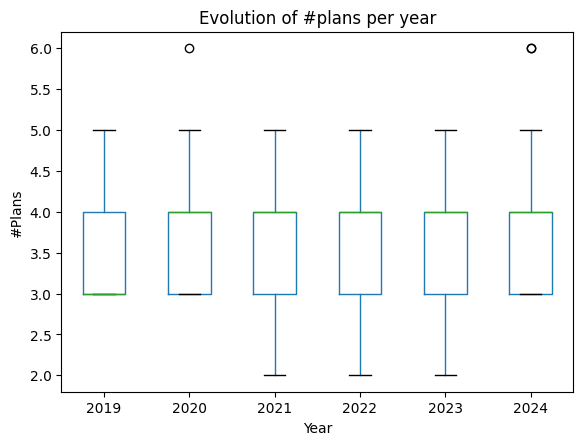

<Figure size 1200x800 with 0 Axes>

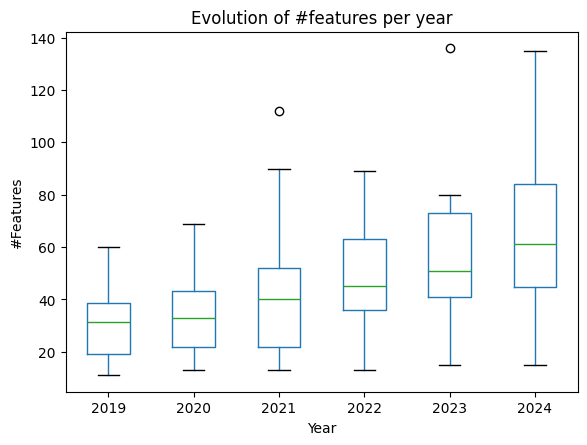

<Figure size 1200x800 with 0 Axes>

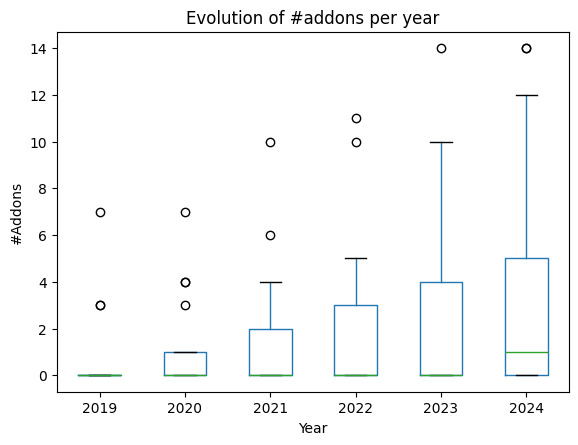

In [74]:
# Draw a boxplot of plans per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Plans', by='Year', grid=False)
plt.title('Evolution of #plans per year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('#Plans')
plt.show()

# Draw a boxplot of features per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Features', by='Year', grid=False)
plt.title('Evolution of #features per year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('#Features')
plt.show()

# Draw a boxplot of addons per year
plt.figure(figsize=(12, 8))
df.boxplot(column='Addons', by='Year', grid=False)
plt.title('Evolution of #addons per year')
plt.suptitle('')
plt.xlabel('Year')
plt.ylabel('#Addons')
plt.show()

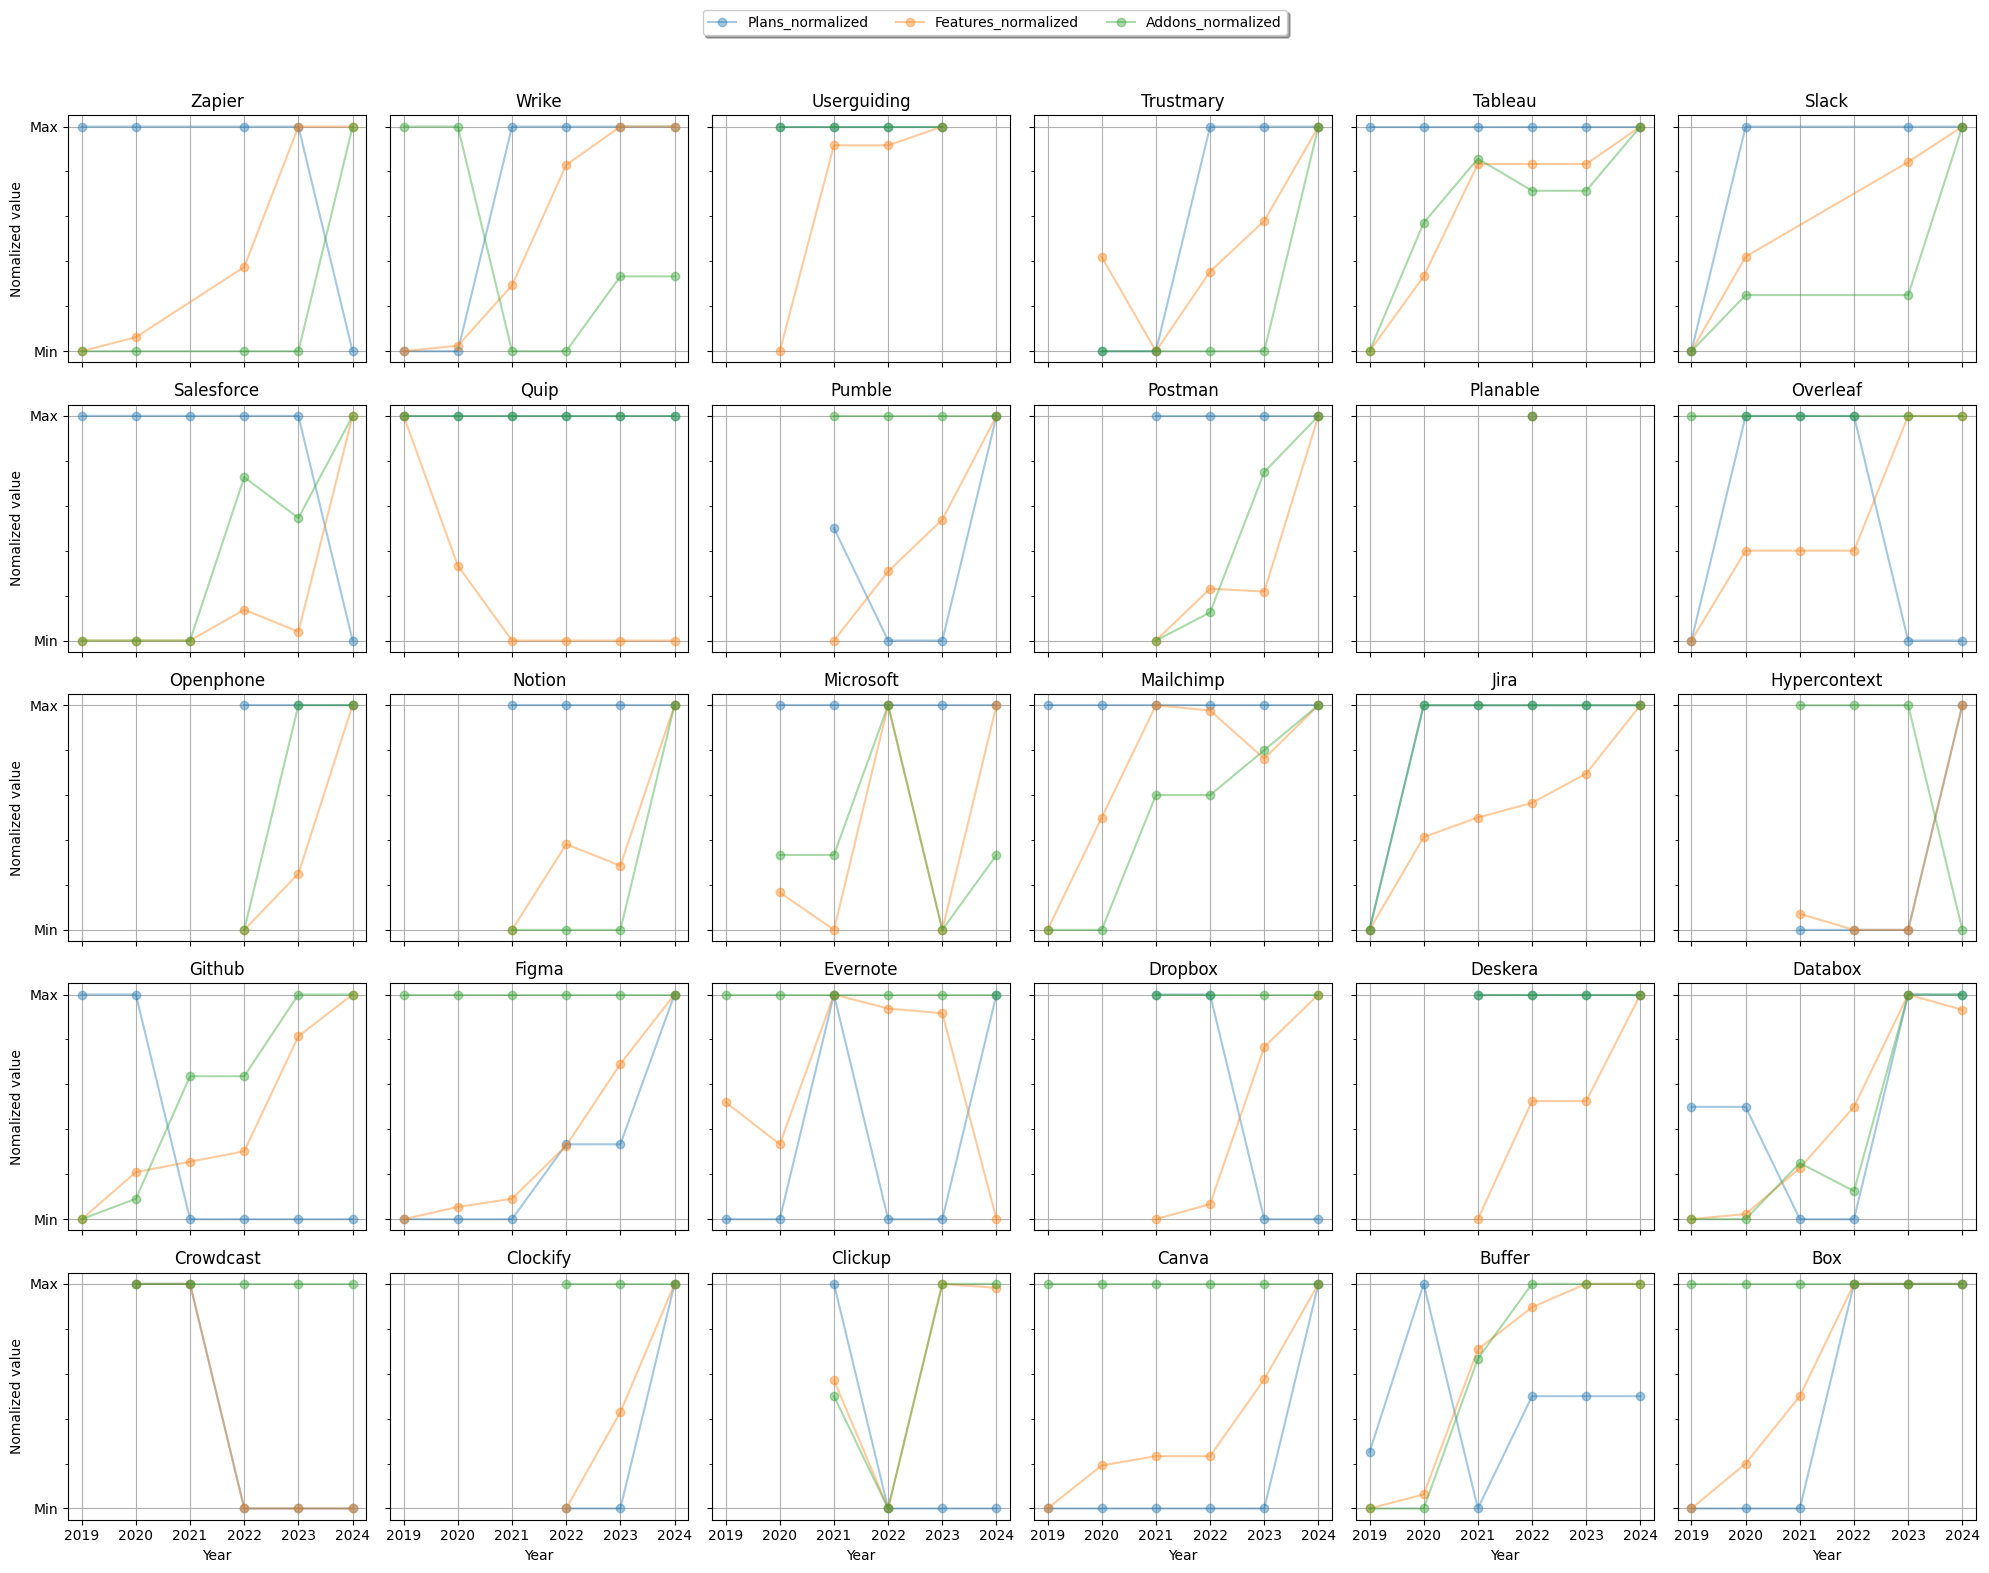

In [76]:
# Setting up the subplots as a 5x6 grid
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the data
saas_companies = df_normalized['Saas'].unique()
for i, saas in enumerate(saas_companies):
    df_saas = df_normalized[df_normalized['Saas'] == saas]
    ax = axes[i]
    df_saas.plot(x='Year', y=['Plans_normalized', 'Features_normalized', 'Addons_normalized'], ax=ax, marker='o', alpha=0.4)
    ax.set_title(f'{saas}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Nomalized value')
    #ax.legend(['Plans Normalized', 'Features Normalized', 'Addons Normalized'])
    ax.grid(True)
    ax.get_legend().remove()  # Remove legend from subplots

    # Customizing the x-axis labels to show 'min' and 'max'
    min_label = "Min" #f"Min: P({df_saas['Plans_min'].iloc[0]}), F({df_saas['Features_min'].iloc[0]}), A({df_saas['Addons_min'].iloc[0]})"
    max_label = "Max" #f"Max: P({df_saas['Plans_max'].iloc[0]}), F({df_saas['Features_max'].iloc[0]}), A({df_saas['Addons_max'].iloc[0]})"
    ax.set_yticks([0, 1])
    ax.set_yticklabels([min_label, max_label])

# Remove any empty subplots
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])

# Add a single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)

plt.tight_layout(rect=[0, 0, 1, 0.999])  # Adjust layout to make space for the legend
plt.tight_layout()
plt.show()


---

# ALTERNATIVES TO PREVIOUS VISUALIZATION

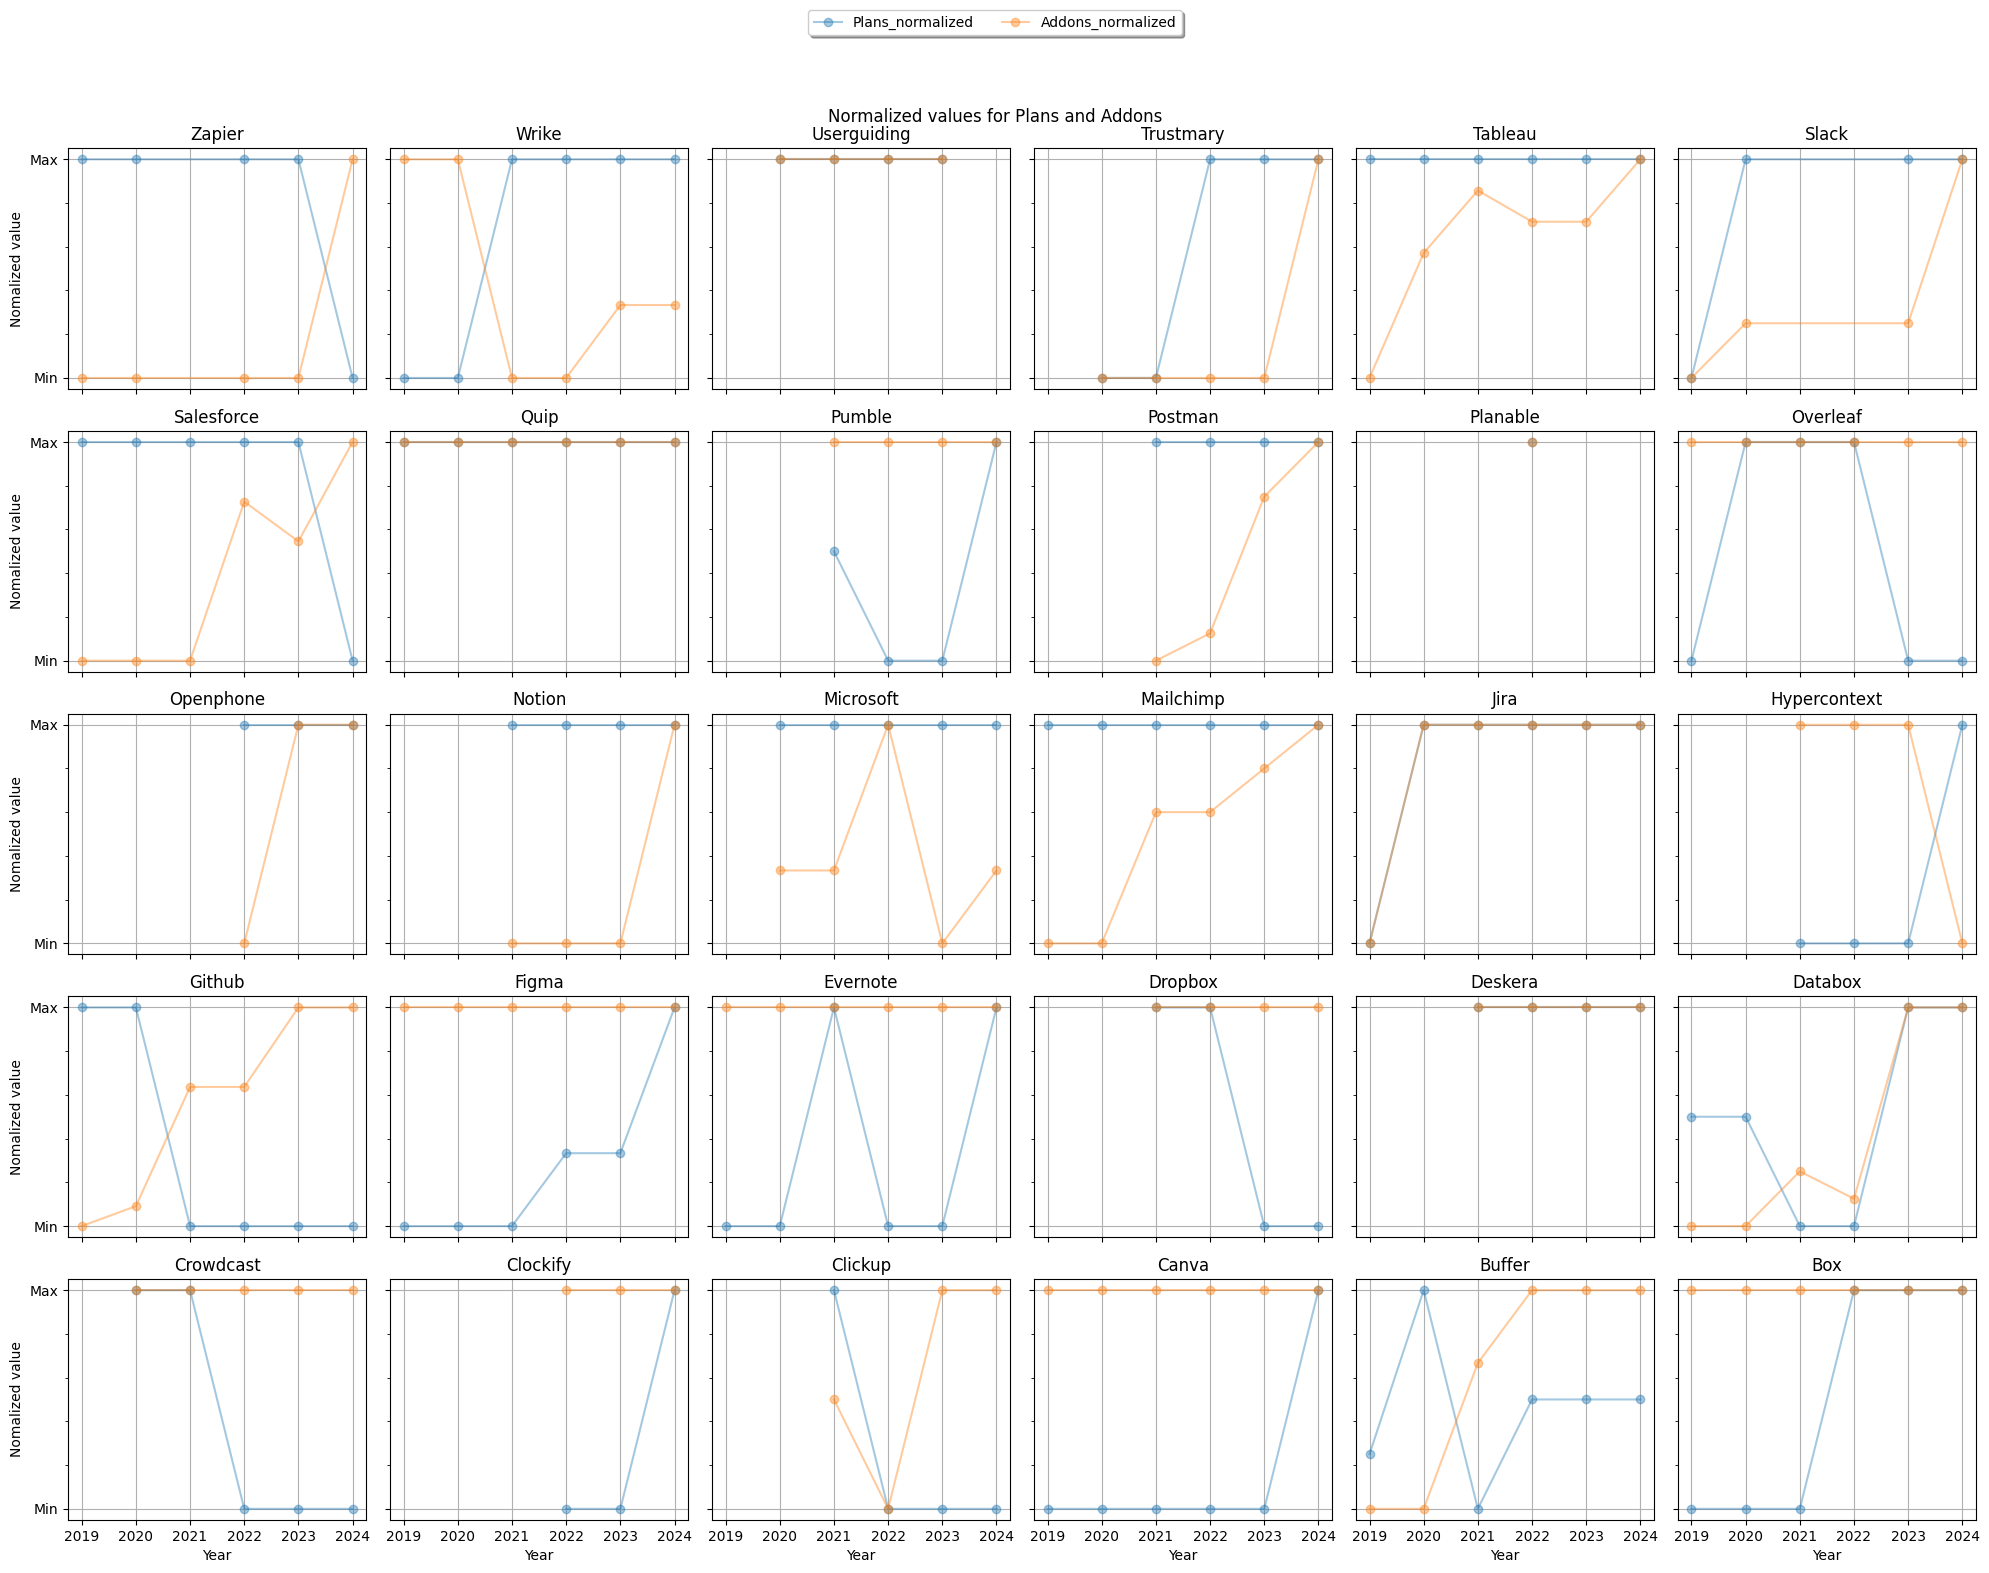

In [77]:
# Setting up the subplots as a 5x6 grid
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the data
saas_companies = df_normalized['Saas'].unique()
for i, saas in enumerate(saas_companies):
    df_saas = df_normalized[df_normalized['Saas'] == saas]
    ax = axes[i]
    df_saas.plot(x='Year', y=['Plans_normalized', 'Addons_normalized'], ax=ax, marker='o', alpha=0.4)
    ax.set_title(f'{saas}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Nomalized value')
    #ax.legend(['Plans Normalized', 'Features Normalized', 'Addons Normalized'])
    ax.grid(True)
    ax.get_legend().remove()  # Remove legend from subplots

    # Customizing the x-axis labels to show 'min' and 'max'
    min_label = "Min" #f"Min: P({df_saas['Plans_min'].iloc[0]}), F({df_saas['Features_min'].iloc[0]}), A({df_saas['Addons_min'].iloc[0]})"
    max_label = "Max" #f"Max: P({df_saas['Plans_max'].iloc[0]}), F({df_saas['Features_max'].iloc[0]}), A({df_saas['Addons_max'].iloc[0]})"
    ax.set_yticks([0, 1])
    ax.set_yticklabels([min_label, max_label])

# Remove any empty subplots
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])

# Add a single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
fig.suptitle('Normalized values for Plans and Addons')

plt.tight_layout(rect=[0, 0, 1, 0.999])  # Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

In [78]:
def normalize_features(df):

    col_min = 0
    col_max = df.groupby('Saas')["Features"].transform('max')
    dif = col_max - col_min                
    df['Features_normalized'] = (df["Features"] - col_min) / dif
    df['Features_normalized'] = df['Features_normalized'].where(dif != 0, 1)
    df['Features_min'] = col_min
    df['Features_max'] = col_max

    return df

df_normalized_features = normalize_features(df)

df_normalized_features

,Saas,Year,Plans,Features,Addons,Has_Many_Products,Plans_normalized,Plans_min,Plans_max,Features_normalized,Features_min,Features_max,Addons_normalized,Addons_min,Addons_max
0,Zapier,2019,5,19,0,False,1.0,4,5,0.372549,0,51,0.0,0,4
1,Zapier,2020,5,21,0,False,1.0,4,5,0.411765,0,51,0.0,0,4
2,Zapier,2022,5,31,0,False,1.0,4,5,0.607843,0,51,0.0,0,4
3,Zapier,2023,5,51,0,False,1.0,4,5,1.000000,0,51,0.0,0,4
4,Zapier,2024,4,51,4,False,0.0,4,5,1.000000,0,51,1.0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
142,Box,2020,4,42,0,False,0.0,4,5,0.840000,0,50,1.0,0,0
143,Box,2021,4,45,0,False,0.0,4,5,0.900000,0,50,1.0,0,0
144,Box,2022,5,50,0,False,1.0,4,5,1.000000,0,50,1.0,0,0
145,Box,2023,5,50,0,False,1.0,4,5,1.000000,0,50,1.0,0,0


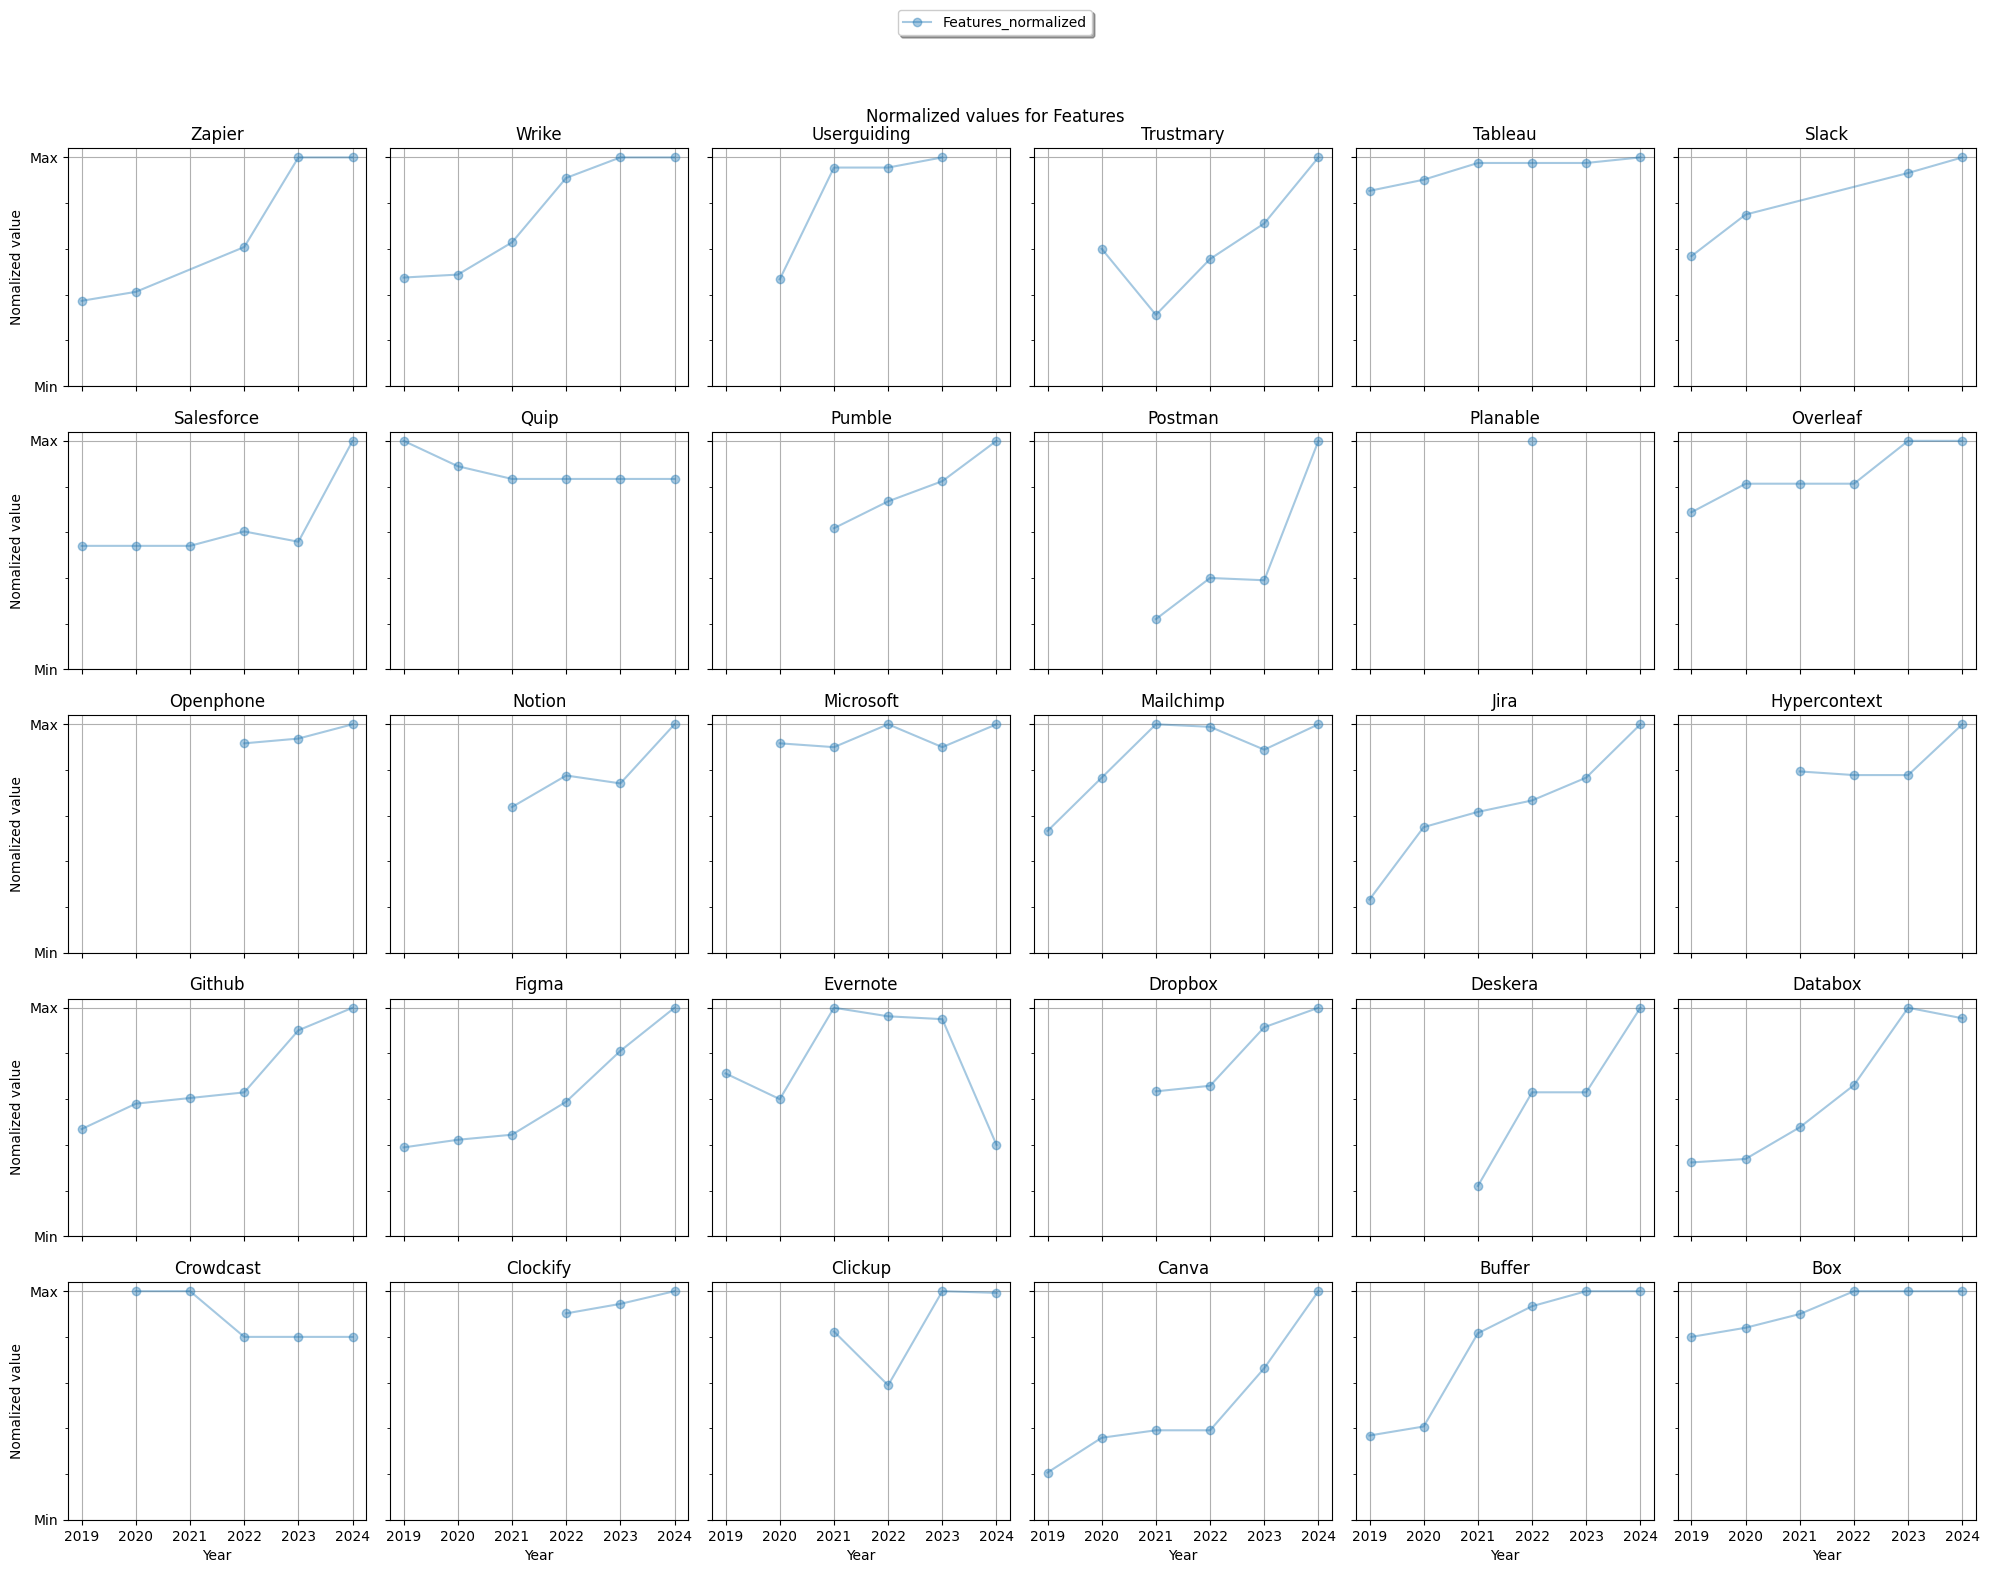

In [80]:
# Setting up the subplots as a 5x6 grid
fig, axes = plt.subplots(nrows=5, ncols=6, figsize=(20, 15), sharex=True, sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plotting the data
saas_companies = df_normalized_features['Saas'].unique()
for i, saas in enumerate(saas_companies):
    df_saas = df_normalized_features[df_normalized_features['Saas'] == saas]
    ax = axes[i]
    df_saas.plot(x='Year', y='Features_normalized', ax=ax, marker='o', alpha=0.4)
    ax.set_title(f'{saas}')
    ax.set_xlabel('Year')
    ax.set_ylabel('Nomalized value')
    #ax.legend(['Plans Normalized', 'Features Normalized', 'Addons Normalized'])
    ax.grid(True)
    ax.get_legend().remove()  # Remove legend from subplots

    # Customizing the x-axis labels to show 'min' and 'max'
    min_label = "Min" #f"Min: P({df_saas['Plans_min'].iloc[0]}), F({df_saas['Features_min'].iloc[0]}), A({df_saas['Addons_min'].iloc[0]})"
    max_label = "Max" #f"Max: P({df_saas['Plans_max'].iloc[0]}), F({df_saas['Features_max'].iloc[0]}), A({df_saas['Addons_max'].iloc[0]})"
    ax.set_yticks([0, 1])
    ax.set_yticklabels([min_label, max_label])

# Remove any empty subplots
#for j in range(i+1, len(axes)):
#    fig.delaxes(axes[j])

# Add a single legend at the top
handles, labels = ax.get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', ncol=3, bbox_to_anchor=(0.5, 1.05), fancybox=True, shadow=True)
fig.suptitle('Normalized values for Features')

plt.tight_layout(rect=[0, 0, 1, 0.999])  # Adjust layout to make space for the legend
plt.tight_layout()
plt.show()

---

# NEW SUGGESTED PLOTS AND METRICS

In [ ]:
def get_feature_data_from_dataset(dataset):
    data = {}
    feature_types = ["INFORMATION", "INTEGRATION", "DOMAIN", "AUTOMATION", "MANAGEMENT", "GUARANTEE", "SUPPORT", "PAYMENT"]

    for i in range(len(dataset)):
        pricing: PricingManager = dataset[i]
        saas_index_name = pricing.saas_name.split(" ")[0].strip().lower().capitalize()
        if pricing.year == int(STUDIED_YEARS[-1]):
            data[saas_index_name] = {}
            for feature_type in feature_types:
                index_name = f"{feature_type.lower()}_features"
                data[saas_index_name][index_name] = len(list(filter(lambda x: x.__class__.__name__.upper() == feature_type, pricing.features.values())))

    data_items = sorted(data.items(), key=lambda x: x[0])
    data = dict(data_items)

    return data

def build_features_dataframe(data):
    # Inicializamos una lista para almacenar los registros
    records = []

    # Iteramos a través del diccionario anidado
    for saas, metrics in data.items():
            if metrics is not None:  # Verificamos si hay métricas disponibles para ese año
                # Creamos un registro con la estructura deseada y lo añadimos a la lista de registros
                record = {
                    'Saas': saas,
                    'Information_Features': metrics.get('information_features'),
                    'Integration_Features': metrics.get('integration_features'),
                    'Domain_Features': metrics.get('domain_features'),
                    'Automation_Features': metrics.get('automation_features'),
                    'Management_Features': metrics.get('management_features'),
                    'Guarantee_Features': metrics.get('guarantee_features'),
                    'Support_Features': metrics.get('support_features'),
                    'Payment_Features': metrics.get('payment_features'),
                }
                records.append(record)

    # Convertimos la lista de registros a un DataFrame de Pandas
    df = pd.DataFrame(records, columns=['Saas', 'Information_Features', 'Integration_Features', 'Domain_Features', 'Automation_Features', 'Management_Features', 'Guarantee_Features', 'Support_Features', 'Payment_Features'])
    return df

# Construcción del DataFrame
data = get_feature_data_from_dataset(dataset)
features_df = build_features_dataframe(data)

# Mostrar el DataFrame
features_df

,Saas,Information_Features,Integration_Features,Domain_Features,Automation_Features,Management_Features,Guarantee_Features,Support_Features,Payment_Features
0,Box,2,9,21,1,9,7,1,0
1,Buffer,22,18,20,9,4,0,3,0
2,Canva,5,7,33,15,18,3,10,1
3,Clickup,1,17,83,9,15,3,7,0
4,Clockify,9,8,40,1,13,1,0,0
5,Crowdcast,2,2,9,0,0,0,2,1
6,Databox,4,12,27,7,6,1,5,0
7,Deskera,8,12,64,10,5,1,0,0
8,Dropbox,4,5,43,3,11,12,3,1
9,Evernote,1,11,10,2,4,1,3,0


In [16]:
def compute_global_feature_distribution(data):
    # Eliminar la columna 'Saas' para centrarnos solo en las features
    df_features = data.drop(columns=['Saas'])

    # Contar el total de cada feature
    feature_totals = df_features.sum()

    # Calcular el porcentaje de cada feature
    feature_percentages = feature_totals / feature_totals.sum() * 100

    # Crear un DataFrame con los resultados
    result_df = pd.DataFrame({
        'Feature_Type': feature_percentages.index,
        'Percentage': feature_percentages.values
    })

    return result_df

# Calcular la distribución de las features
feature_distribution = compute_global_feature_distribution(features_df)

# Mostrar la distribución de las features
display(Markdown("# Global Feature Distribution"))
display(Markdown(feature_distribution.to_markdown()))

# Global Feature Distribution

|    | Feature_Type         |   Percentage |
|---:|:---------------------|-------------:|
|  0 | Information_Features |     6.43729  |
|  1 | Integration_Features |    14.3729   |
|  2 | Domain_Features      |    48.0577   |
|  3 | Automation_Features  |     9.76693  |
|  4 | Management_Features  |    12.7636   |
|  5 | Guarantee_Features   |     3.21865  |
|  6 | Support_Features     |     5.04994  |
|  7 | Payment_Features     |     0.332963 |

In [25]:
def compute_mean_feature_distribution(data):
    # Eliminar la columna 'Saas' para centrarnos solo en las features
    df_features = data.drop(columns=['Saas'])

    df_percentages = df_features.div(df_features.sum(axis=1), axis=0) * 100

    # Añadir la columna 'Saas' de nuevo al DataFrame de porcentajes
    df_percentages['Saas'] = data['Saas']
    
    # Calcular la media porcentual de cada tipo de feature
    mean_percentages = df_percentages.drop(columns=['Saas']).mean()
    
    # Crear un DataFrame con los resultados de las medias porcentuales
    result_df = pd.DataFrame({
        'Feature_Type': mean_percentages.index,
        'Mean_Percentage': mean_percentages.values
    })
    
    return df_percentages, result_df

# Calcular la distribución de las features normalizadas
df_percentages, mean_feature_distribution_df = compute_mean_feature_distribution(features_df)
display(Markdown("# Feature Distribution By SaaS"))
display(Markdown(df_percentages.to_markdown()))
display(Markdown("# Mean Feature Distribution"))
display(Markdown(mean_feature_distribution_df.to_markdown()))

# Feature Distribution By SaaS

|    |   Information_Features |   Integration_Features |   Domain_Features |   Automation_Features |   Management_Features |   Guarantee_Features |   Support_Features |   Payment_Features | Saas         |
|---:|-----------------------:|-----------------------:|------------------:|----------------------:|----------------------:|---------------------:|-------------------:|-------------------:|:-------------|
|  0 |               4        |               18       |           42      |               2       |              18       |             14       |            2       |            0       | Box          |
|  1 |              28.9474   |               23.6842  |           26.3158 |              11.8421  |               5.26316 |              0       |            3.94737 |            0       | Buffer       |
|  2 |               5.43478  |                7.6087  |           35.8696 |              16.3043  |              19.5652  |              3.26087 |           10.8696  |            1.08696 | Canva        |
|  3 |               0.740741 |               12.5926  |           61.4815 |               6.66667 |              11.1111  |              2.22222 |            5.18519 |            0       | Clickup      |
|  4 |              12.5      |               11.1111  |           55.5556 |               1.38889 |              18.0556  |              1.38889 |            0       |            0       | Clockify     |
|  5 |              12.5      |               12.5     |           56.25   |               0       |               0       |              0       |           12.5     |            6.25    | Crowdcast    |
|  6 |               6.45161  |               19.3548  |           43.5484 |              11.2903  |               9.67742 |              1.6129  |            8.06452 |            0       | Databox      |
|  7 |               8        |               12       |           64      |              10       |               5       |              1       |            0       |            0       | Deskera      |
|  8 |               4.87805  |                6.09756 |           52.439  |               3.65854 |              13.4146  |             14.6341  |            3.65854 |            1.21951 | Dropbox      |
|  9 |               3.125    |               34.375   |           31.25   |               6.25    |              12.5     |              3.125   |            9.375   |            0       | Evernote     |
| 10 |               4.44444  |               17.7778  |           47.7778 |               2.22222 |              24.4444  |              0       |            3.33333 |            0       | Figma        |
| 11 |               6.17284  |               17.284   |           16.0494 |              34.5679  |              20.9877  |              0       |            3.7037  |            1.23457 | Github       |
| 12 |              12.6984   |               23.8095  |           41.2698 |               9.52381 |               7.93651 |              0       |            4.7619  |            0       | Hypercontext |
| 13 |              10        |                6.66667 |           53.3333 |               3.33333 |              10       |              8.33333 |            6.66667 |            1.66667 | Jira         |
| 14 |               5.55556  |                7.77778 |           58.8889 |              12.2222  |               5.55556 |              1.11111 |            8.88889 |            0       | Mailchimp    |
| 15 |               1.66667  |                1.66667 |           65      |               6.66667 |              13.3333  |              6.66667 |            5       |            0       | Microsoft    |
| 16 |               6.89655  |               15.5172  |           51.7241 |               3.44828 |              17.2414  |              1.72414 |            3.44828 |            0       | Notion       |
| 17 |               8.33333  |               18.75    |           45.8333 |              14.5833  |               6.25    |              0       |            6.25    |            0       | Openphone    |
| 18 |               6.25     |               31.25    |           56.25   |               0       |               0       |              0       |            6.25    |            0       | Overleaf     |
| 19 |               5        |               11       |           34      |               8       |              31       |              3       |            7       |            1       | Postman      |
| 20 |               0        |                8.82353 |           58.8235 |               5.88235 |               5.88235 |              8.82353 |           11.7647  |            0       | Pumble       |
| 21 |               6.66667  |               60       |           33.3333 |               0       |               0       |              0       |            0       |            0       | Quip         |
| 22 |               2.7027   |               12.6126  |           64.8649 |              12.6126  |               1.8018  |              0       |            5.40541 |            0       | Salesforce   |
| 23 |               9.09091  |               13.6364  |           25      |              13.6364  |              18.1818  |             18.1818  |            2.27273 |            0       | Slack        |
| 24 |               4.87805  |                7.31707 |           60.9756 |              19.5122  |               7.31707 |              0       |            0       |            0       | Tableau      |
| 25 |               2.22222  |               22.2222  |           51.1111 |               6.66667 |               4.44444 |              2.22222 |           11.1111  |            0       | Trustmary    |
| 26 |               2.5641   |               23.0769  |           46.1538 |              10.2564  |              15.3846  |              2.5641  |            0       |            0       | Wrike        |
| 27 |               3.92157  |                7.84314 |           45.098  |              15.6863  |              17.6471  |              1.96078 |            7.84314 |            0       | Zapier       |

# Mean Feature Distribution

|    | Feature_Type         |   Mean_Percentage |
|---:|:---------------------|------------------:|
|  0 | Information_Features |          6.63006  |
|  1 | Integration_Features |         16.5841   |
|  2 | Domain_Features      |         47.2927   |
|  3 | Automation_Features  |          8.86505  |
|  4 | Management_Features  |         11.4284   |
|  5 | Guarantee_Features   |          3.42256  |
|  6 | Support_Features     |          5.33214  |
|  7 | Payment_Features     |          0.444918 |

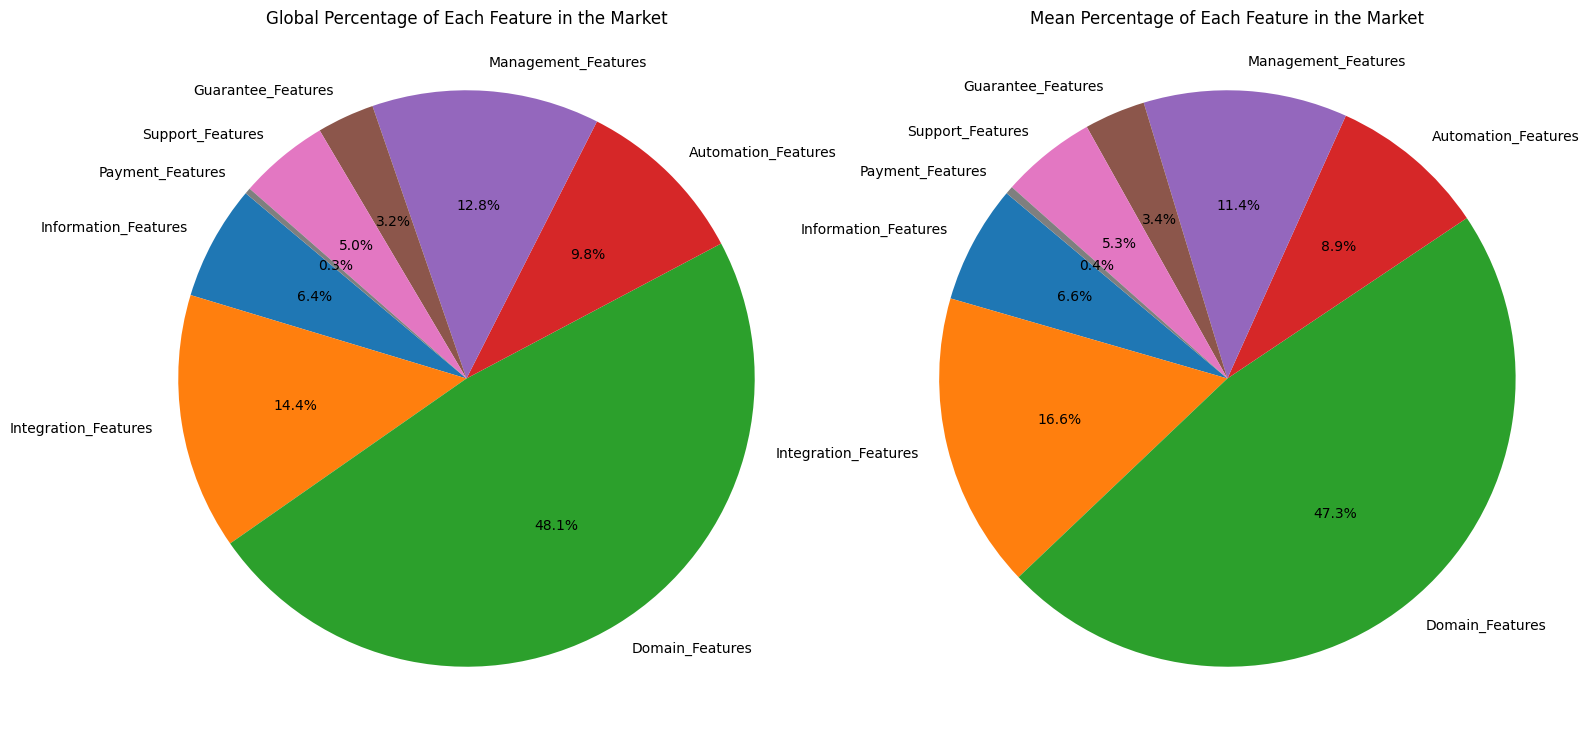

In [30]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

ax1.pie(feature_distribution['Percentage'], labels=feature_distribution['Feature_Type'], autopct='%1.1f%%', startangle=140)
ax1.set_title('Global Percentage of Each Feature in the Market')
ax1.axis('equal')  # Para asegurar que el gráfico sea un círculo

ax2.pie(mean_feature_distribution_df['Mean_Percentage'], labels=mean_feature_distribution_df['Feature_Type'], autopct='%1.1f%%', startangle=140)
ax2.set_title('Mean Percentage of Each Feature in the Market')
ax2.axis('equal')  # Para asegurar que el gráfico sea un círculo

plt.show()

---

<Figure size 1200x800 with 0 Axes>

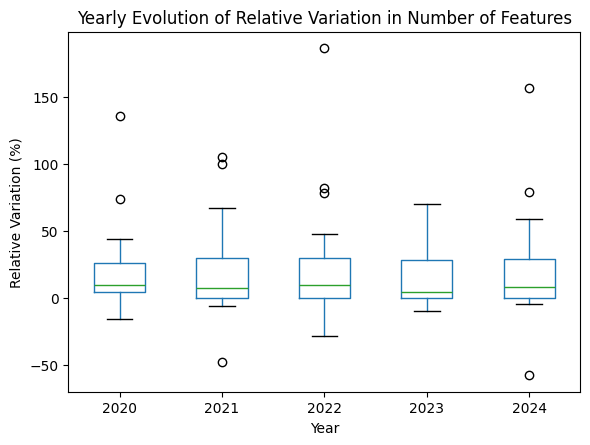

In [39]:
df_feature_percentage = df.copy()
df_feature_percentage['Feature_Percentage_Change'] = df_feature_percentage.groupby('Saas')['Features'].pct_change() * 100

# Filtrar las filas donde la variación es válida (no es NaN)
df_valid = df_feature_percentage.dropna(subset=['Feature_Percentage_Change'])

# Crear un boxplot para las variaciones porcentuales por año
plt.figure(figsize=(12, 8))
df_valid.boxplot(column='Feature_Percentage_Change', by='Year', grid=False)
plt.title('Yearly Evolution of Relative Variation in Number of Features')
plt.suptitle('')  # Para quitar el título adicional generado por pandas
plt.xlabel('Year')
plt.ylabel('Relative Variation (%)')
plt.show()

---

In [50]:
multiple_products_df = df.copy()
multiple_products_df = multiple_products_df[multiple_products_df['Has_Many_Products'] == True]
single_products_df = df.copy()
single_products_df = single_products_df[single_products_df['Has_Many_Products'] == False]

In [51]:
multiple_products_df['Feature_Percentage_Change'] = multiple_products_df.groupby('Saas')['Features'].pct_change() * 100

# Filtrar las filas donde la variación es válida (no es NaN)
multiple_products_df_valid = multiple_products_df.dropna(subset=['Feature_Percentage_Change'])

single_products_df['Feature_Percentage_Change'] = single_products_df.groupby('Saas')['Features'].pct_change() * 100

# Filtrar las filas donde la variación es válida (no es NaN)
single_products_df_valid = single_products_df.dropna(subset=['Feature_Percentage_Change'])

AMOUNT OF SINGLE PRODUCT SAAS: 26
AMOUNT OF MULTIPLE PRODUCT SAAS: 6


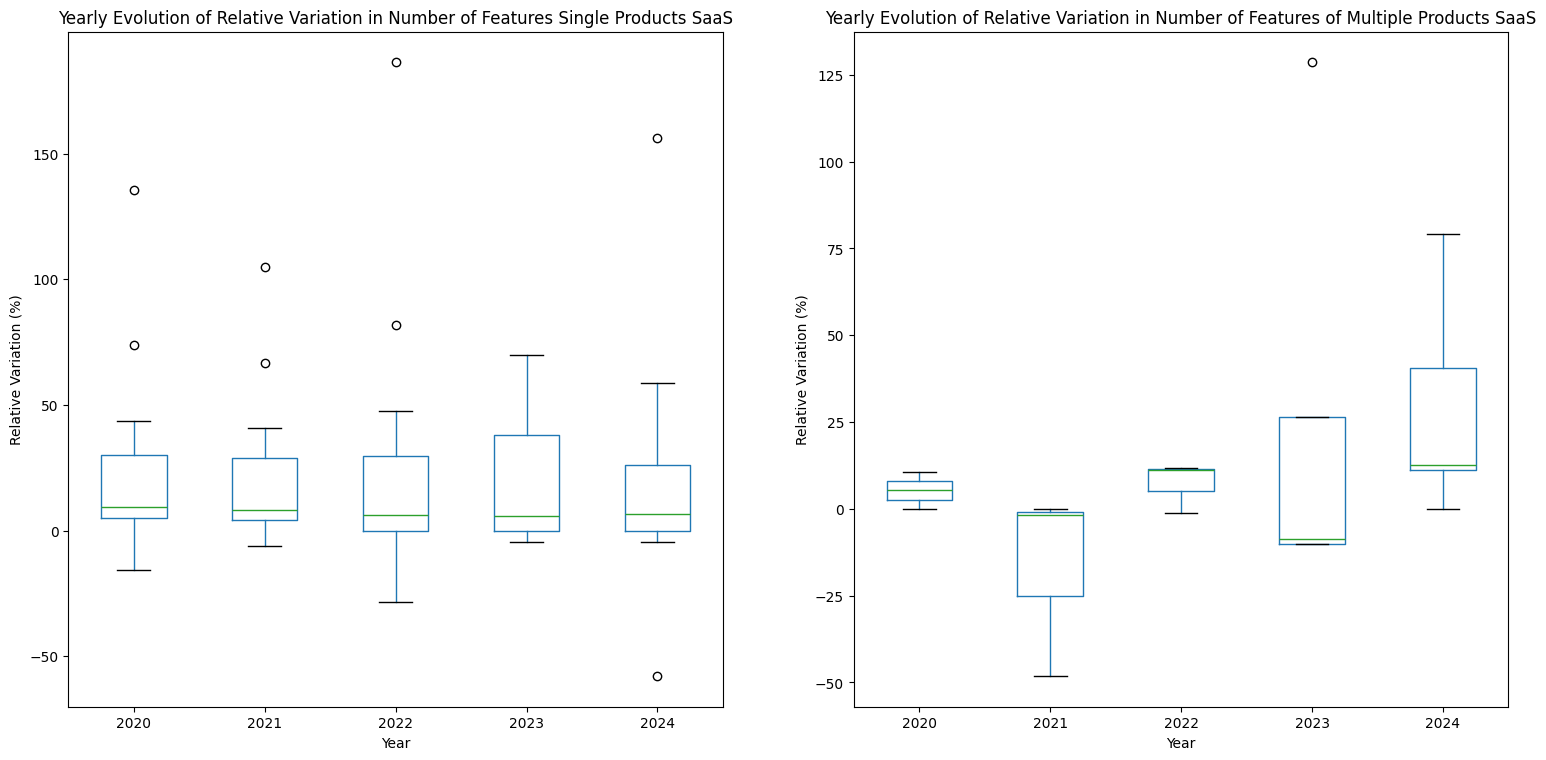

In [61]:
amount_of_single_products = len(single_products_df_valid['Saas'].unique())
amount_of_multiple_products = len(multiple_products_df_valid['Saas'].unique())

print(f"AMOUNT OF SINGLE PRODUCT SAAS: {amount_of_single_products}")
print(f"AMOUNT OF MULTIPLE PRODUCT SAAS: {amount_of_multiple_products}")

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 9))

single_products_df_valid.boxplot(column='Feature_Percentage_Change', by='Year', grid=False, ax=ax1)
ax1.set_title('Yearly Evolution of Relative Variation in Number of Features Single Products SaaS')
ax1.set_xlabel('Year')
ax1.set_ylabel('Relative Variation (%)')

multiple_products_df_valid.boxplot(column='Feature_Percentage_Change', by='Year', grid=False, ax=ax2)
ax2.set_title('Yearly Evolution of Relative Variation in Number of Features of Multiple Products SaaS')
ax2.set_xlabel('Year')
ax2.set_ylabel('Relative Variation (%)')

fig.suptitle('')  # Para quitar el título adicional generado por pandas

plt.show()